# ToR-ORd Population Analysis

This notebook is for analysing the different chains from the inference, separately, and should be read in parallel with the notebook
`torord_population.ipynb`.

## Analysing chains

### Recovering from .csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chi
import pints

In [2]:
num_chains = 1
list_of_chains = []
list_of_chains_Tr = []
for i in range(num_chains):
    df = pd.read_csv("chains/lca_kr_cl/chain.csv", index_col=0)
    chain = df.to_numpy()
    list_of_chains.append(chain)
    df_Tr = pd.read_csv("chains/lca_kr_cl_Tr/chain.csv", index_col=0)
    chain_Tr = df_Tr.to_numpy()
    list_of_chains.append(chain)
    list_of_chains_Tr.append(chain_Tr)
chains = np.array(list_of_chains)
chains_Tr = np.array(list_of_chains_Tr)

### Extracting `param_info` files


Now we wish to extract the `param_info` files so that we may add to them.

In [3]:
param_info_dfs = []
param_info_Tr_dfs = []
for i in range(50):
    param_info_dfs.append(pd.read_csv(f"param_info/param_info_{i}.csv", index_col=0))
    param_info_Tr_dfs.append(pd.read_csv(f"param_info/param_info_Tr_{i}.csv", index_col=0))

### Distribution of the prior samples

Here, we briefly look at the distribution of the different starting positions for our inference.

In [4]:
latex_names = ["$P_{Cab}$", "$G_{Kr}$", "$G_{ClCa}$"]

In [28]:
starting_df = pd.read_csv("optimisation_outputs/x0_biomarkers_Tr.csv", index_col=0)
starting_position_Tr = starting_df.to_numpy()[:, 0]

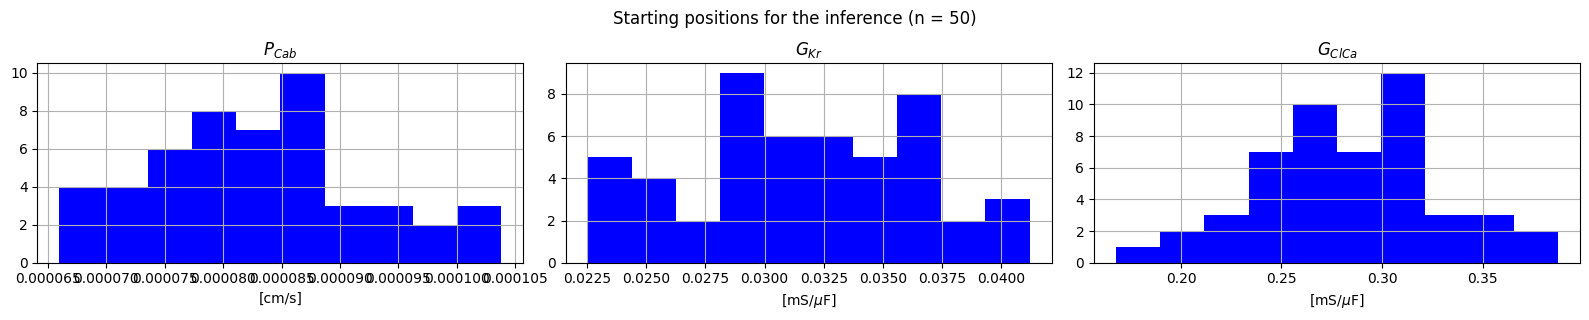

In [5]:
# starting_position = chains[0, 0, :]
starting_data = []
for i in range(50):
    starting_data.append(starting_position[3 * i : 3 * (i + 1)])
starting_df = pd.DataFrame(np.array(starting_data), columns=latex_names)
num_rows, num_columns = 1, 3
num_params = 3
histograms = starting_df.hist(layout=(num_rows, num_columns), figsize=(16, 3), color="blue")
for row in range(num_rows):
    figs_in_row = num_columns
    if row == num_rows - 1:
        r = num_params % num_columns
        figs_in_row = r if r != 0 else num_params // num_rows
    for column in range(figs_in_row):
        index = row * num_columns + column
        ax = histograms[row][column]
        unit = "[cm/s]" if "Cab" in latex_names[index] else "[mS/$\\mu$F]"
        ax.set_xlabel(unit)
plt.tight_layout()
plt.suptitle("Starting positions for the inference (n = 50)", x=0.5, y=1.05)
plt.savefig("inference_outputs/prior_samples_Tr.png", bbox_inches='tight')

### Trace plots

In [6]:
import setuptools
import pints.plot

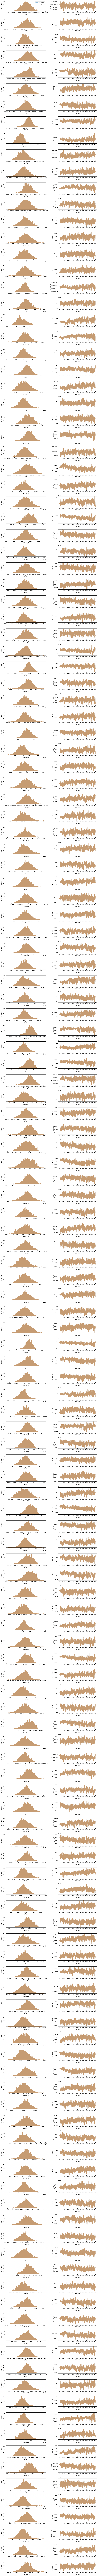

In [7]:
pints.plot.trace(chains, parameter_names=df.columns)
plt.show()

### Diagnosing using $\hat{R}$

Here we find the $\hat{R}$ measure for the inference for all different parameters. For well mixed and stationary chains, $\hat{R}$ is close to $1$.

In [8]:
top_level_names = ["mu_P_Cab", "sigma_P_Cab", "mu_G_Kr", "sigma_G_Kr", "mu_G_ClCa", "sigma_G_ClCa"]
top_level_latex_names = ["$\mu_{Cab}$", "$\sigma_{Cab}$", "$\mu_{Kr}$", "$\sigma_{Kr}$", "$\mu_{ClCa}$", "$\sigma_{ClCa}$"]

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\matth\AppData\Local\Temp\ipykernel_15732\3144290806.py:2: SyntaxWarning: invalid escape sequence '\m'
  top_level_latex_names = ["$\mu_{Cab}$", "$\sigma_{Cab}$", "$\mu_{Kr}$", "$\sigma_{Kr}$", "$\mu_{ClCa}$", "$\sigma_{ClCa}$"]
C:\Users\matth\AppData\Local\Temp\ipykernel_15732\3144290806.py:2: SyntaxWarning: invalid escape sequence '\s'
  top_level_latex_names = ["$\mu_{Cab}$", "$\sigma_{

In [10]:
r_hat_values = pints.rhat(chains, warm_up=0.75)
r_hat_Tr_values = pints.rhat(chains_Tr, warm_up=0.75)
all_param_names = list(df.columns[:-6])
all_param_names += top_level_names
for i in range(len(all_param_names)):
    print(f"R_hat value for {all_param_names[i]}: {round(r_hat_values[i], 5)}")

R_hat value for P_Cab_0: 1.01294
R_hat value for G_Kr_0: 1.00279
R_hat value for G_ClCa_0: 1.00009
R_hat value for P_Cab_1: 0.9998
R_hat value for G_Kr_1: 0.99982
R_hat value for G_ClCa_1: 1.00027
R_hat value for P_Cab_2: 1.02464
R_hat value for G_Kr_2: 0.99996
R_hat value for G_ClCa_2: 1.02441
R_hat value for P_Cab_3: 1.00705
R_hat value for G_Kr_3: 1.07967
R_hat value for G_ClCa_3: 0.9999
R_hat value for P_Cab_4: 0.99994
R_hat value for G_Kr_4: 1.01151
R_hat value for G_ClCa_4: 1.00325
R_hat value for P_Cab_5: 1.02732
R_hat value for G_Kr_5: 1.01065
R_hat value for G_ClCa_5: 1.00096
R_hat value for P_Cab_6: 1.01407
R_hat value for G_Kr_6: 0.9999
R_hat value for G_ClCa_6: 1.00237
R_hat value for P_Cab_7: 1.00324
R_hat value for G_Kr_7: 1.00492
R_hat value for G_ClCa_7: 1.00489
R_hat value for P_Cab_8: 1.00198
R_hat value for G_Kr_8: 1.00528
R_hat value for G_ClCa_8: 1.07648
R_hat value for P_Cab_9: 1.00006
R_hat value for G_Kr_9: 1.0
R_hat value for G_ClCa_9: 0.99998
R_hat value for P

In [11]:
for i in range(50):
    param_info_dfs[i]["R_hat"] = r_hat_values[3 * i : 3 * (i + 1)]
    param_info_Tr_dfs[i]["R_hat"] = r_hat_Tr_values[3 * i : 3 * (i + 1)]

We will now discount the first part of the iterations.

In [12]:
max_iterations = 20000
fraction = 1 / 4
chains = chains[:, -int(fraction * max_iterations):]
chains_Tr = chains_Tr[:, -int(fraction * max_iterations):]

In [20]:
for i in range(50):
    param_info_dfs[i]["Posterior mean"] = np.mean(chains[0, :, 3 * i : 3 * (i + 1)], axis=0)
    param_info_Tr_dfs[i]["Posterior mean"] = np.mean(chains_Tr[0, :, 3 * i : 3 * (i + 1)], axis=0)
    param_info_dfs[i]["Posterior std. dev."] = np.std(chains[0, :, 3 * i : 3 * (i + 1)], axis=0)
    param_info_Tr_dfs[i]["Posterior std. dev."] = np.std(chains_Tr[0, :, 3 * i : 3 * (i + 1)], axis=0)

In [21]:
for i in range(50):
    param_info_dfs[i].to_csv(f"param_info/param_info_{i}.csv")
    param_info_Tr_dfs[i].to_csv(f"param_info/param_info_Tr_{i}.csv")

### Comparing to initial distribution

In [22]:
conductances = pd.read_csv("conductances.csv", index_col=0)

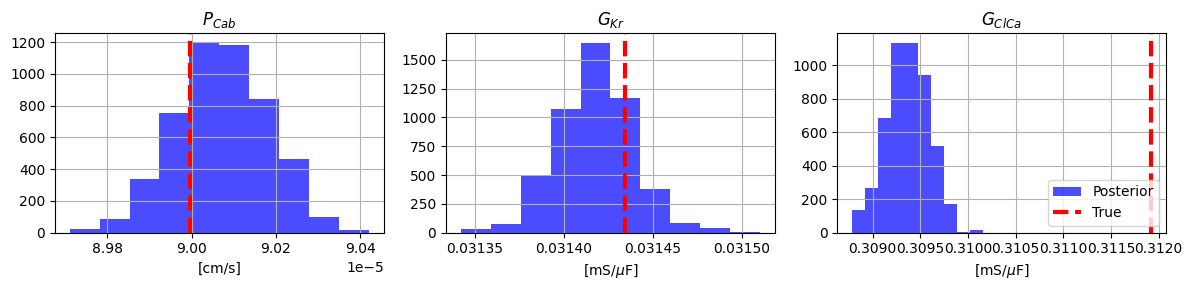

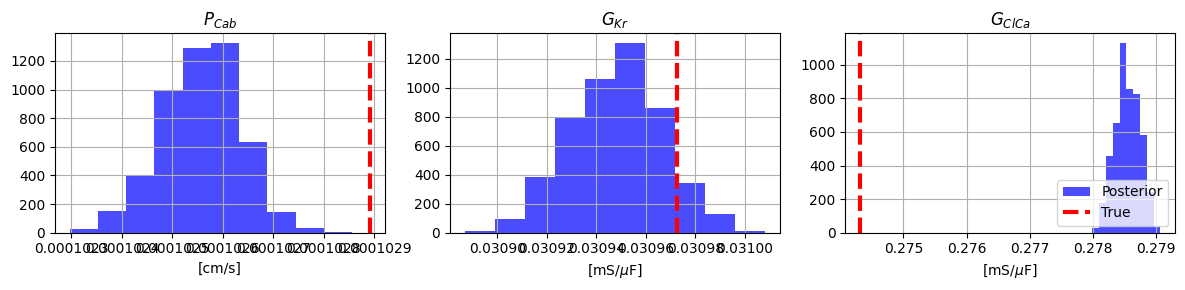

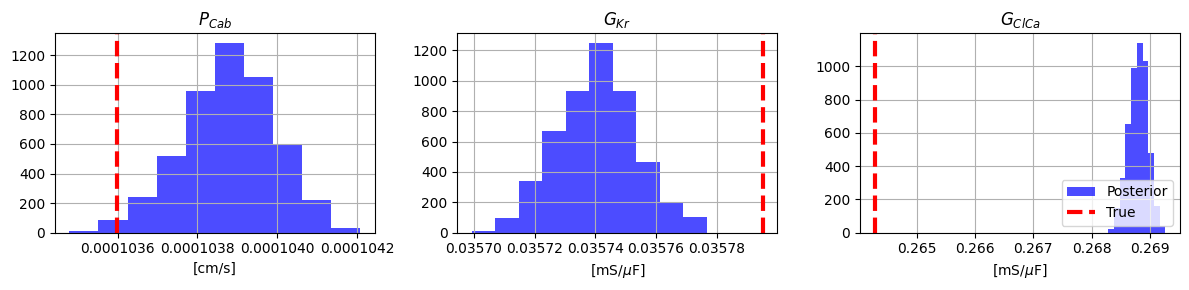

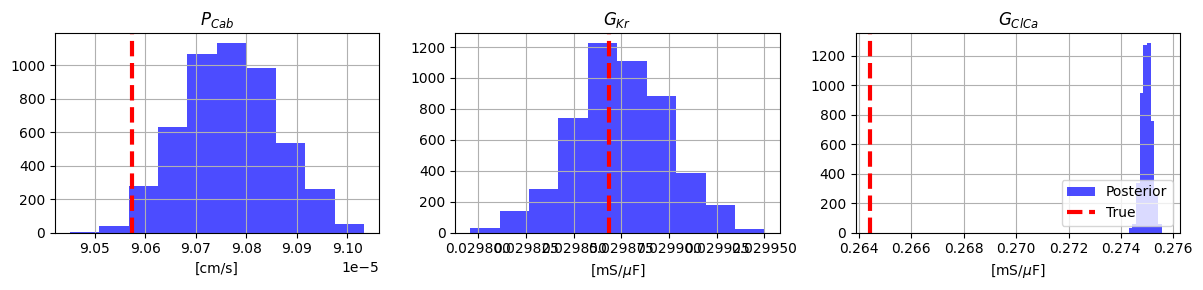

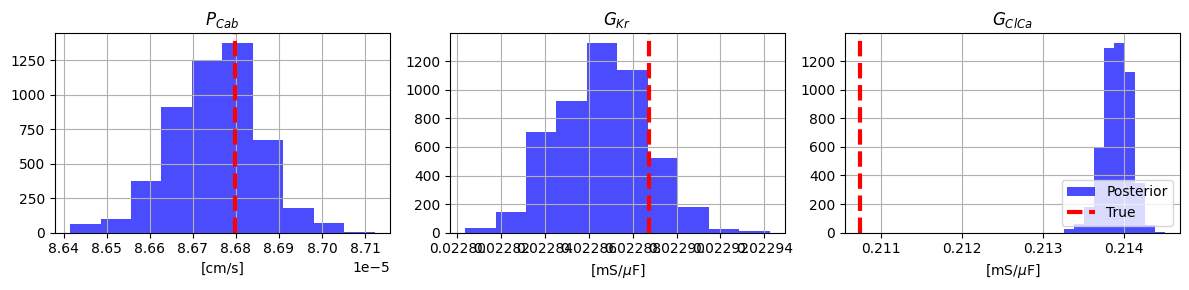

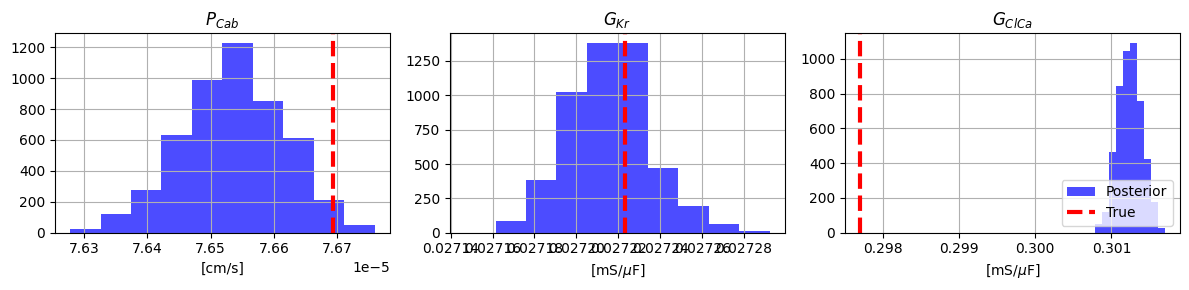

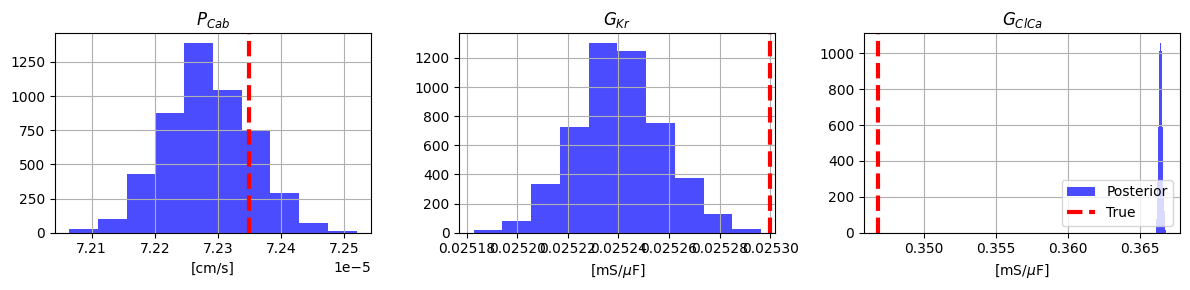

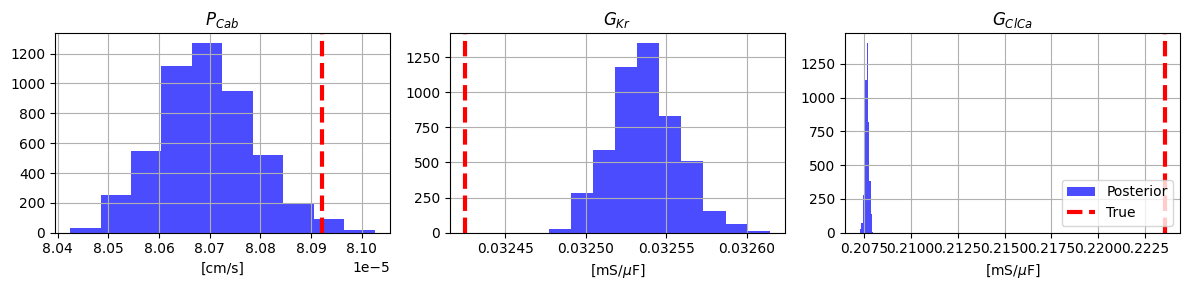

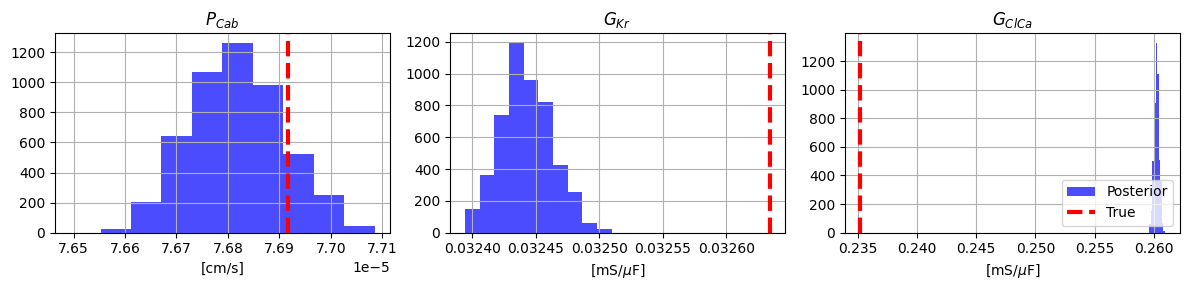

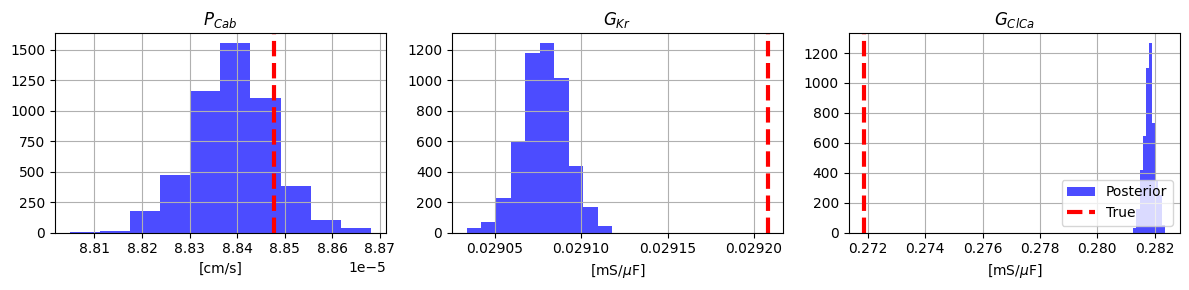

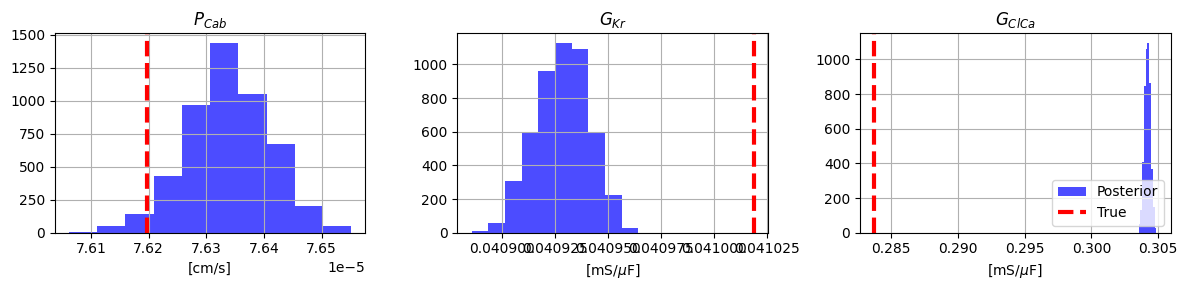

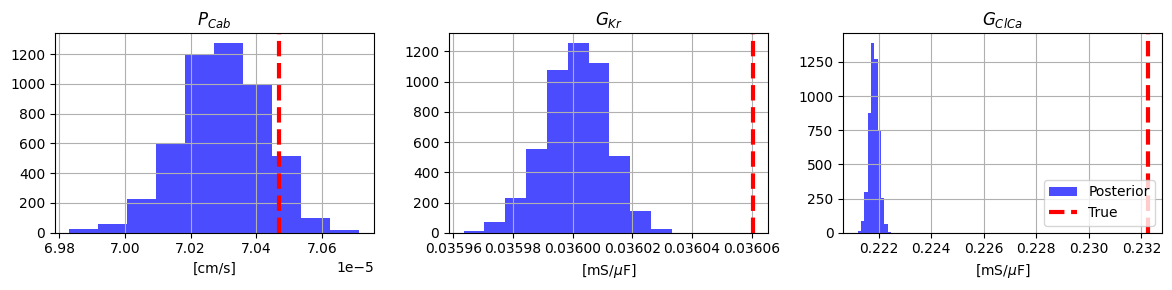

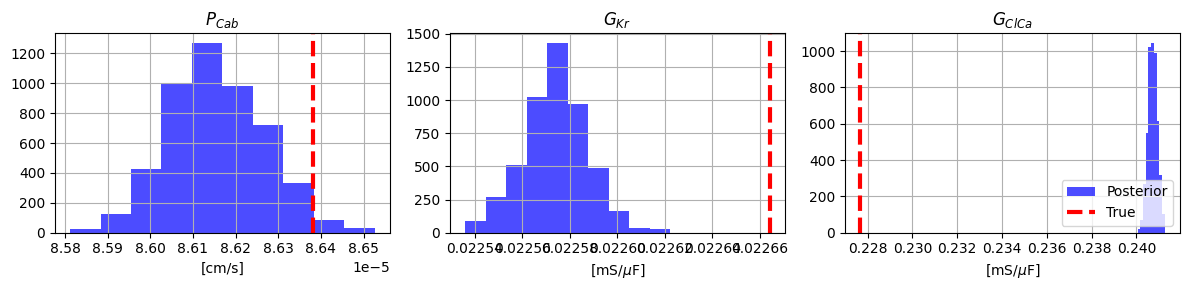

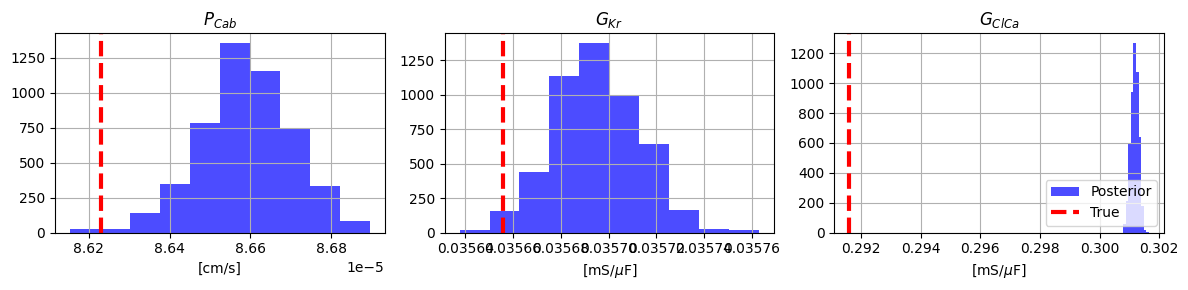

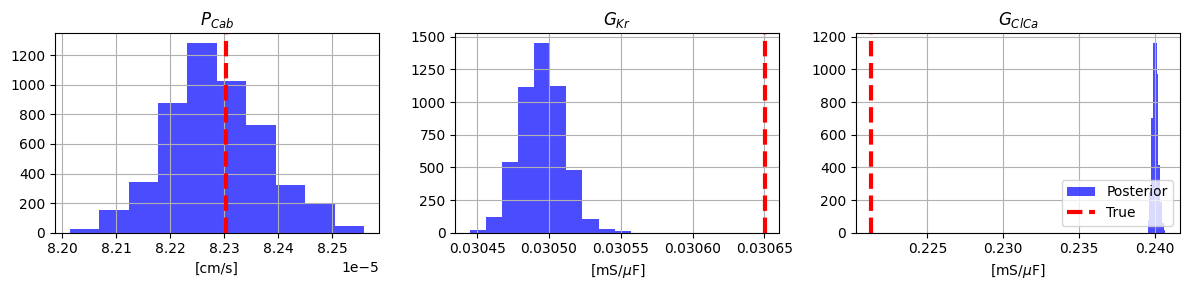

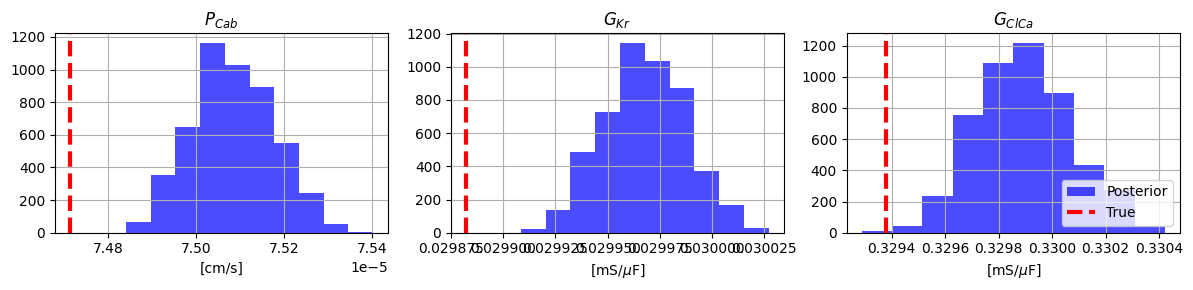

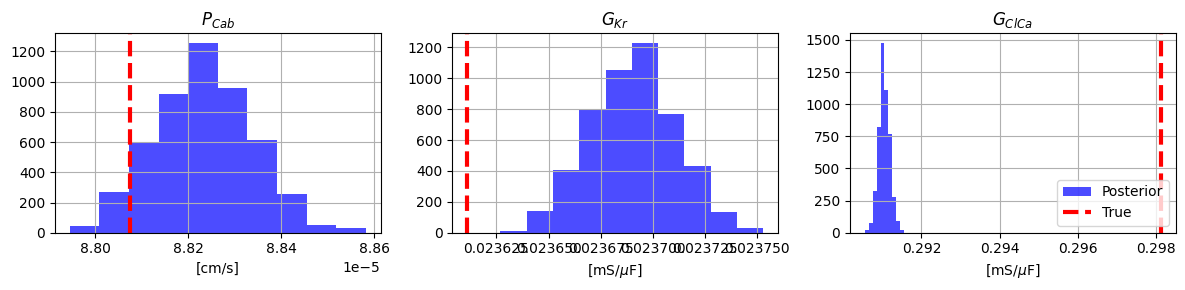

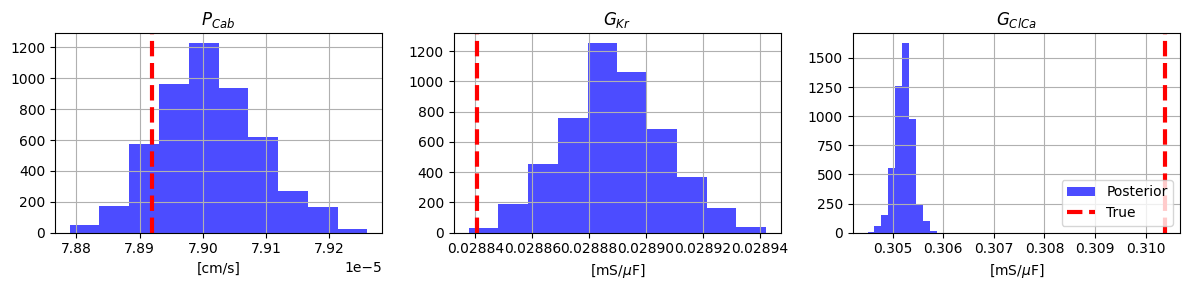

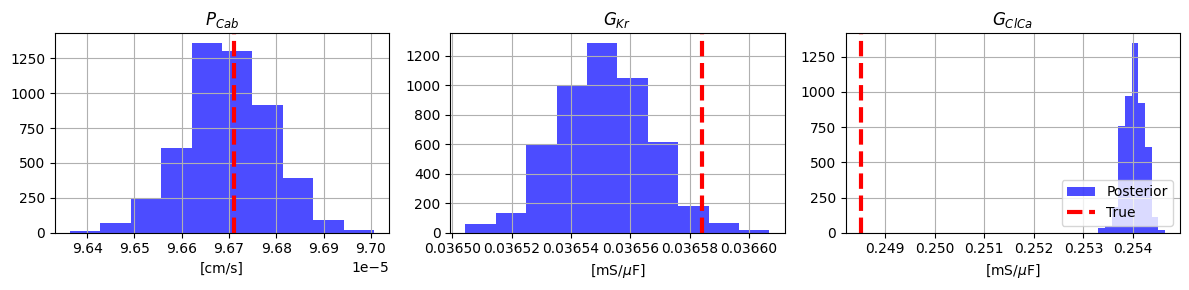

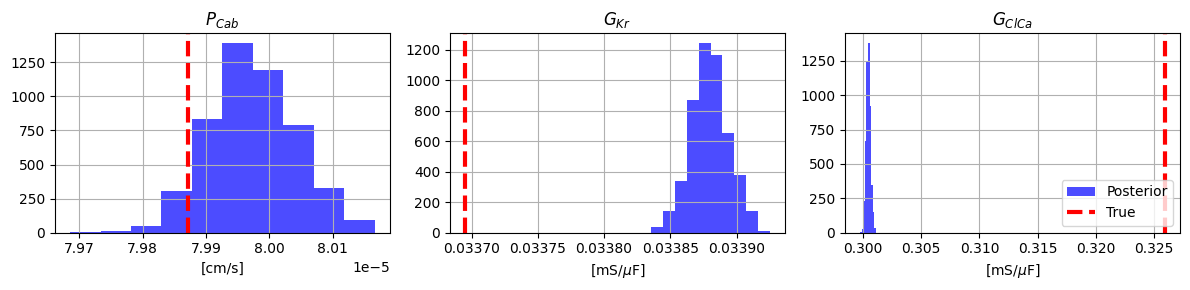

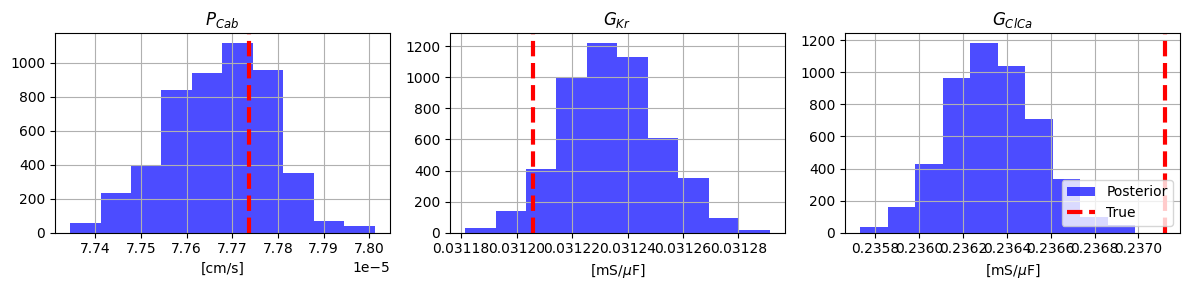

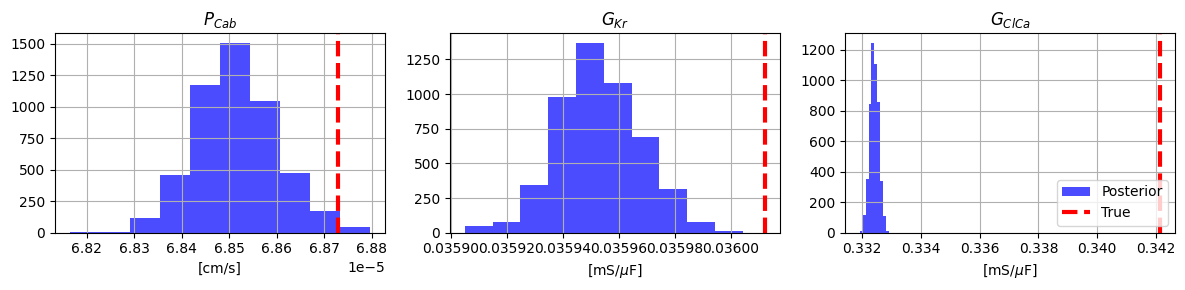

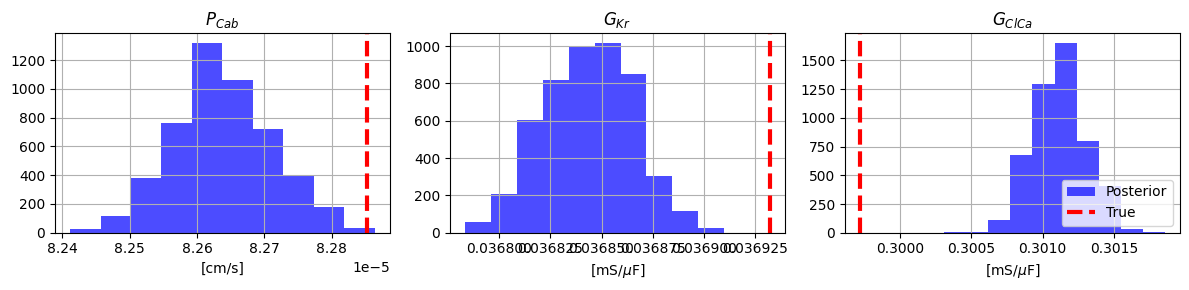

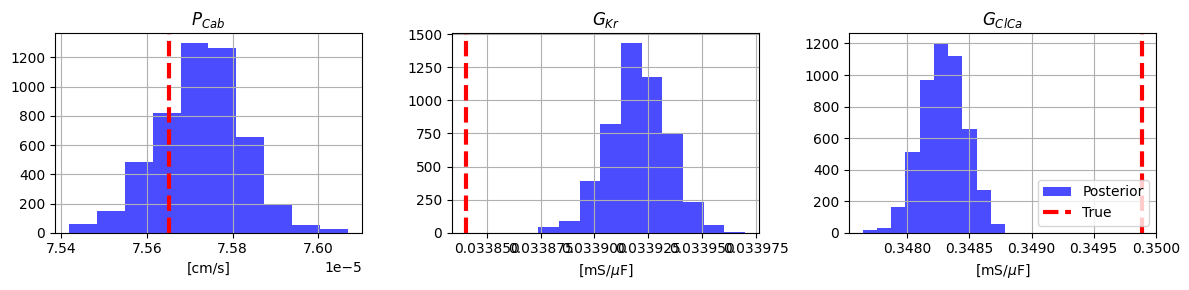

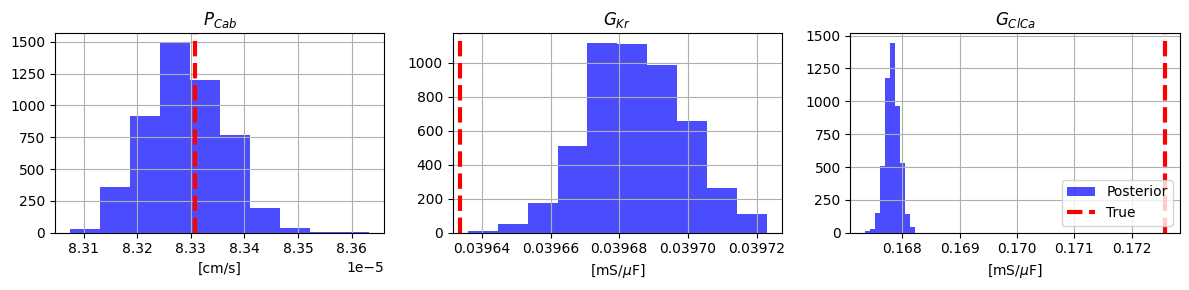

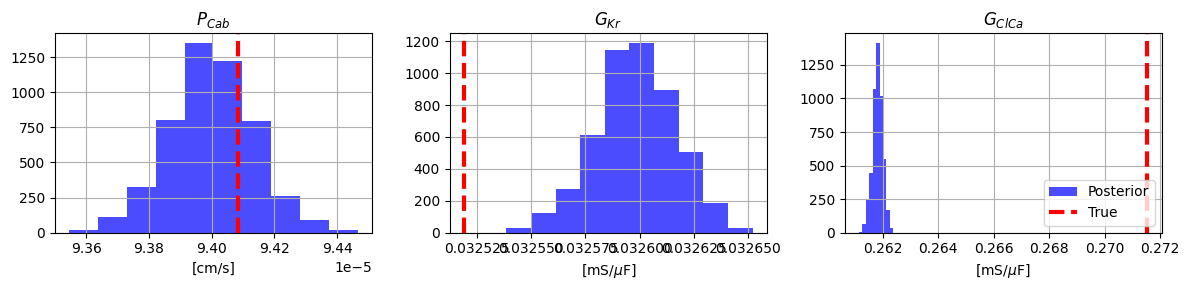

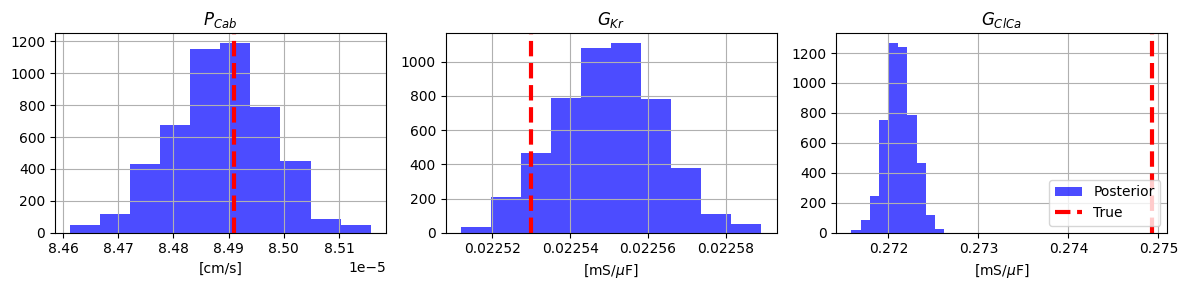

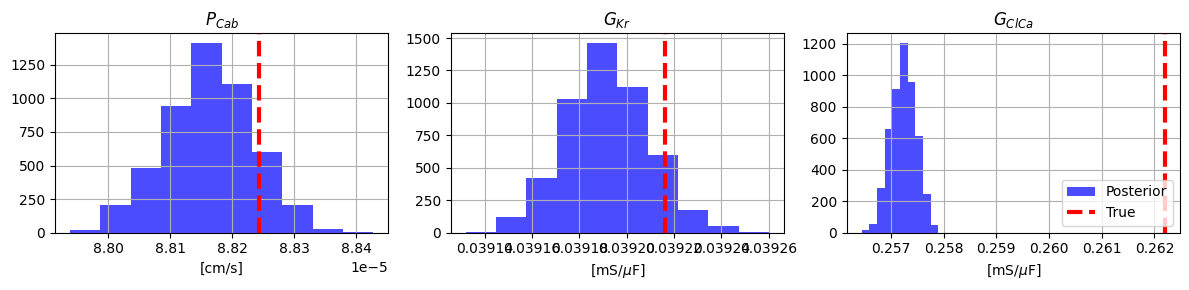

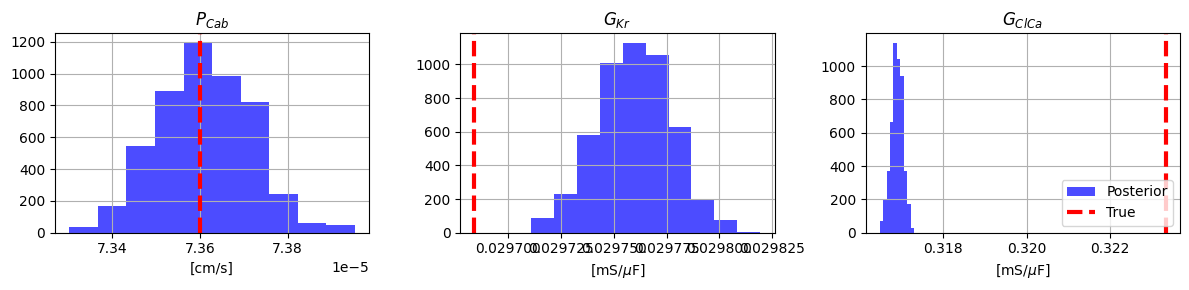

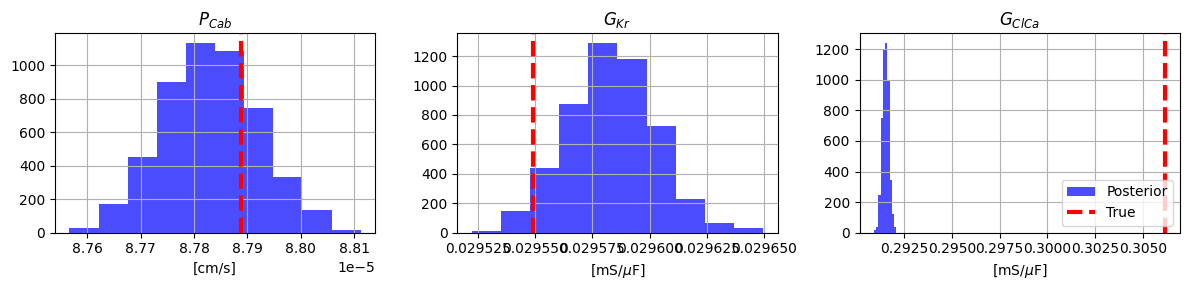

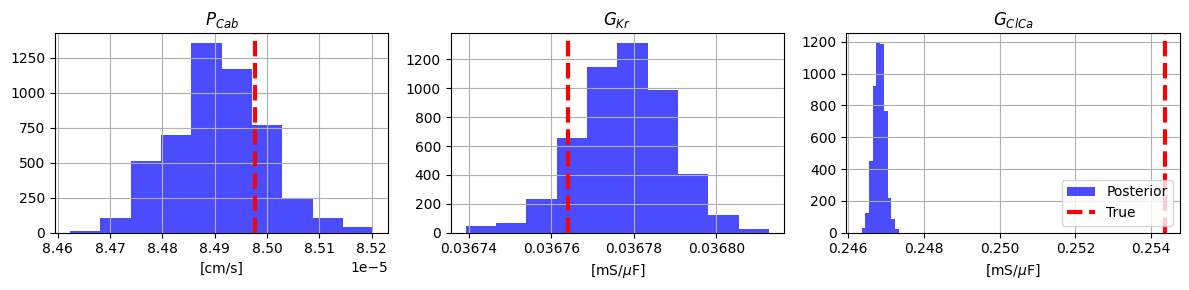

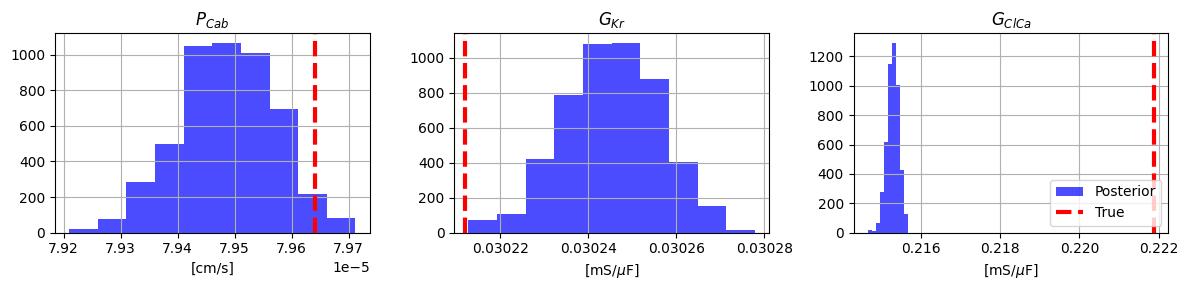

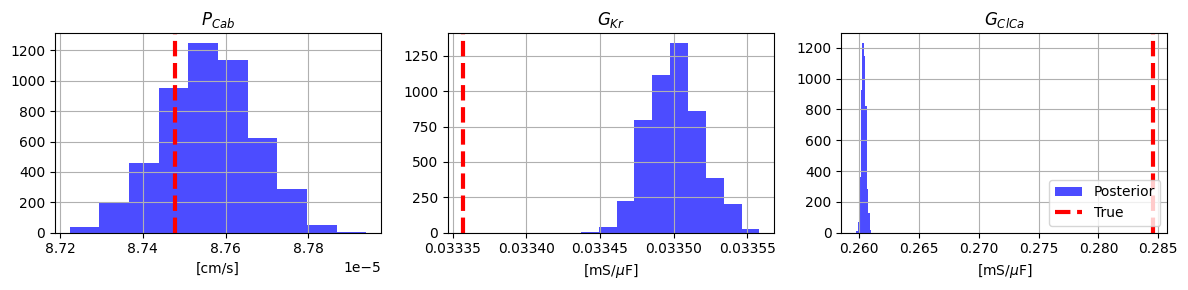

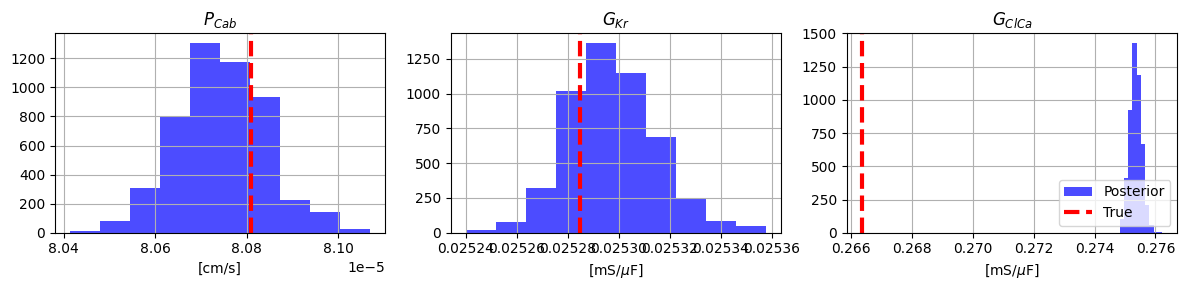

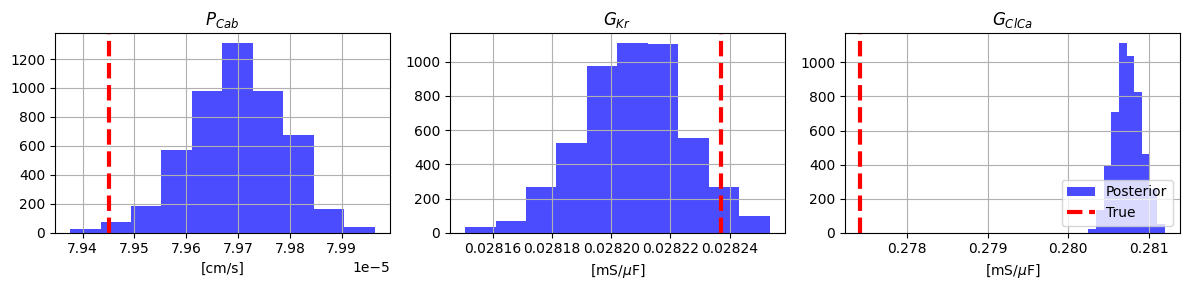

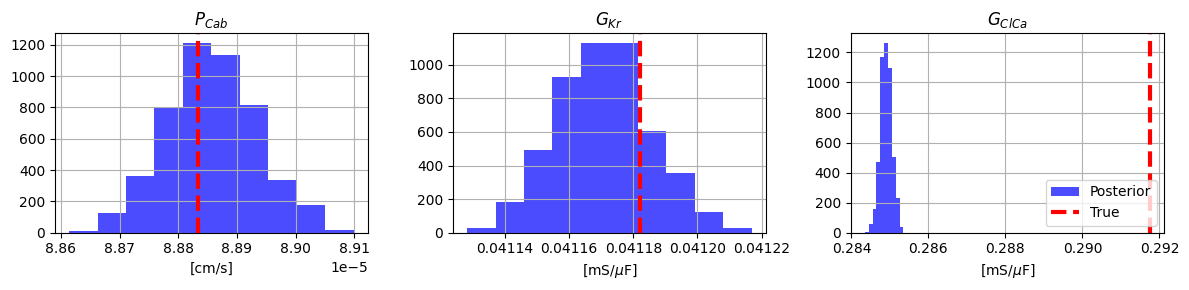

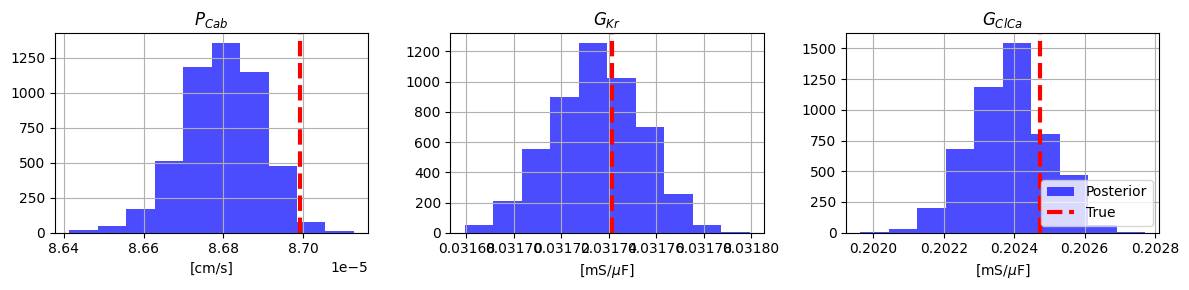

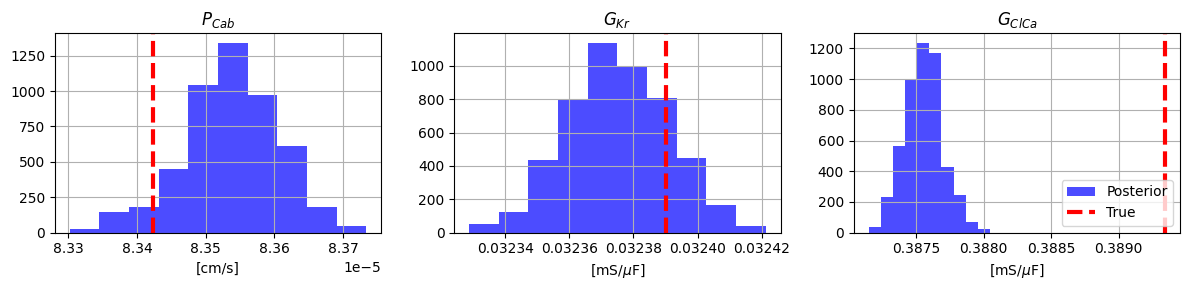

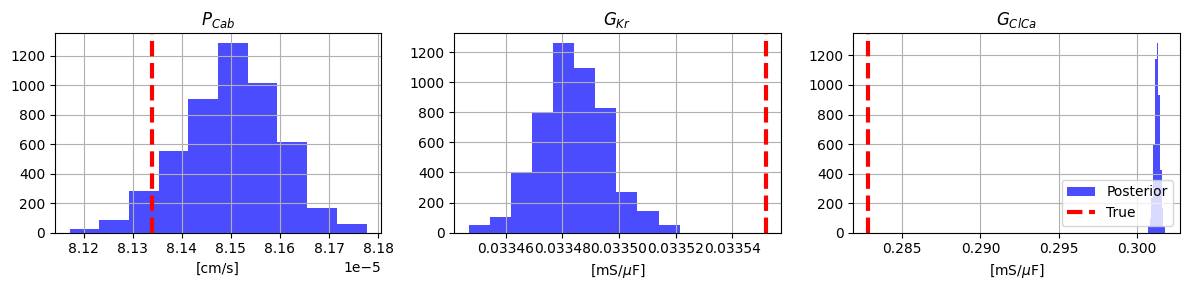

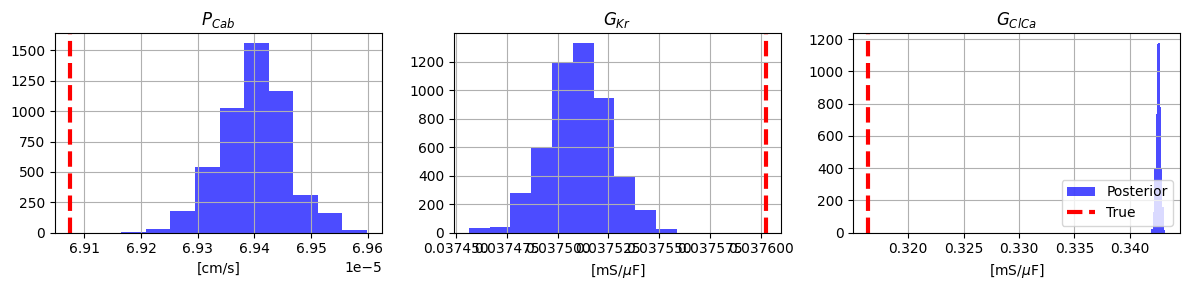

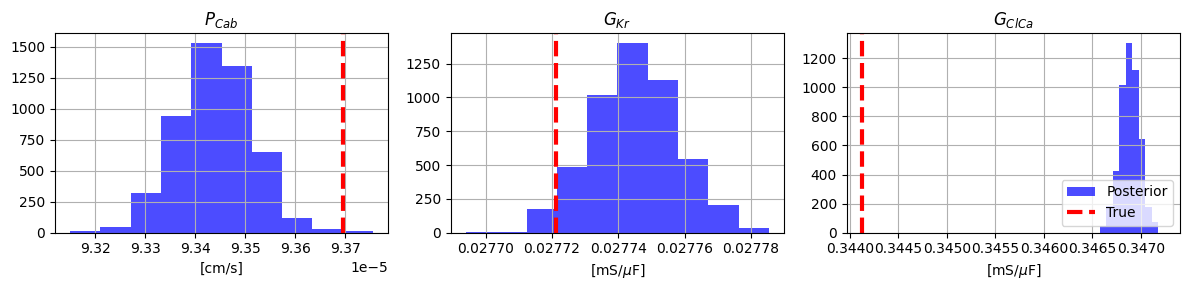

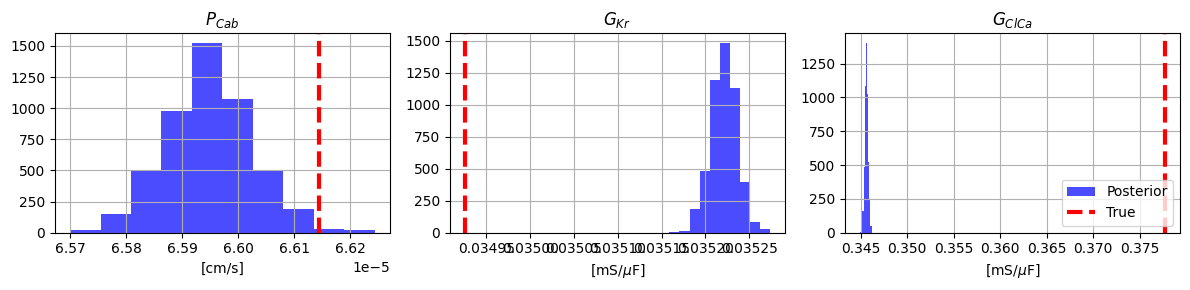

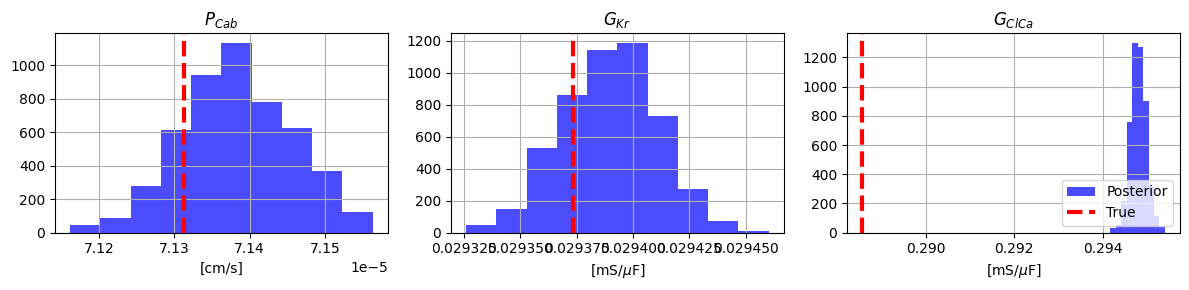

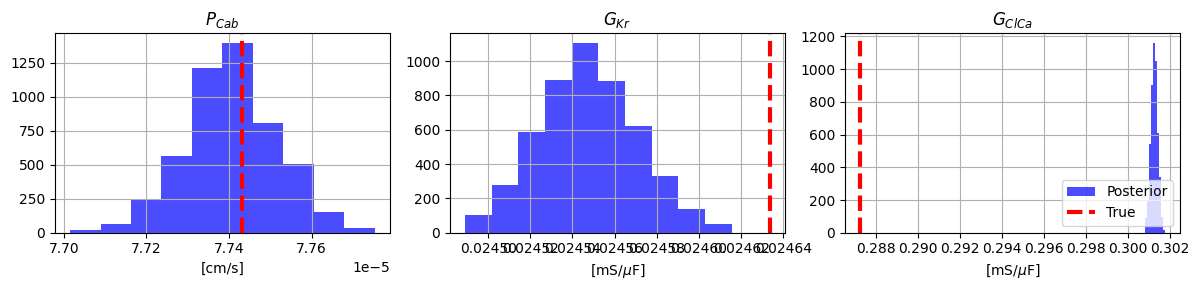

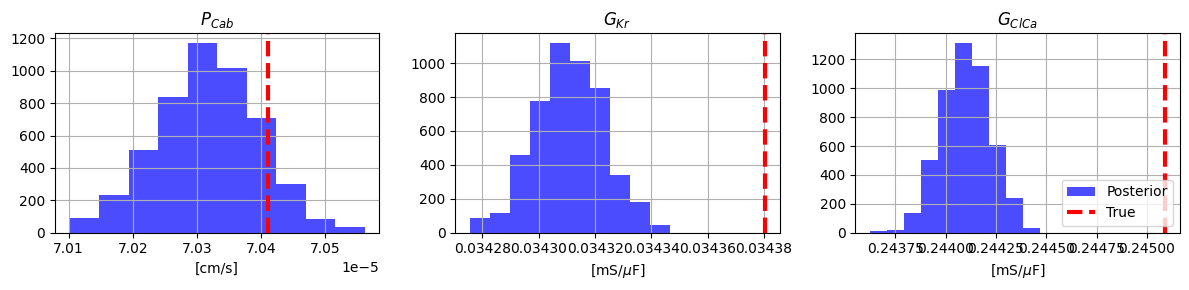

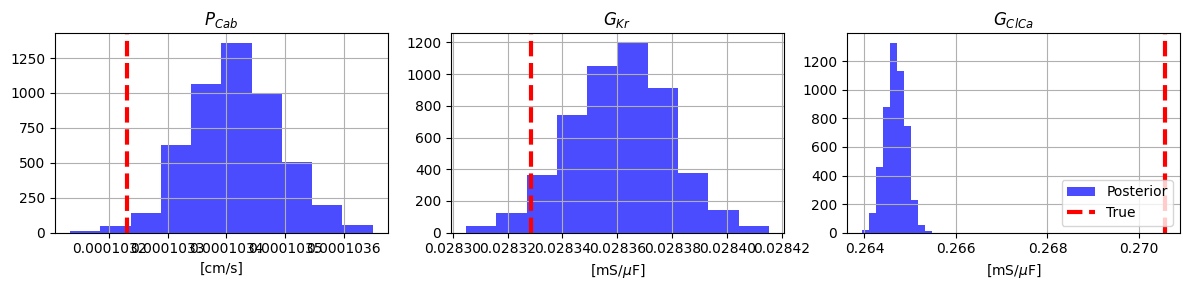

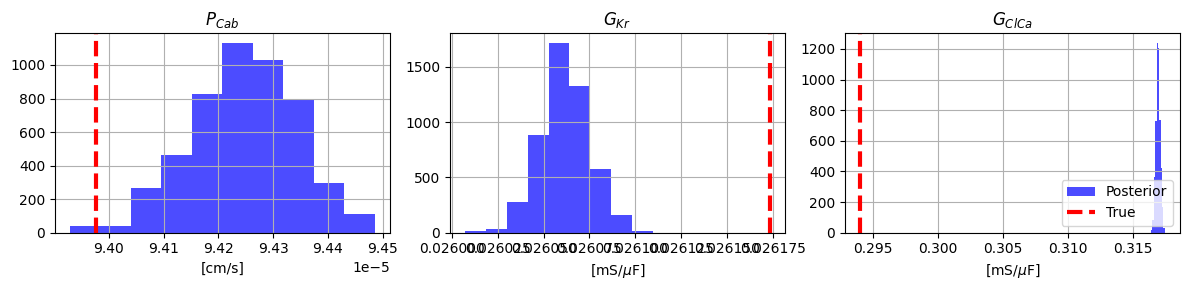

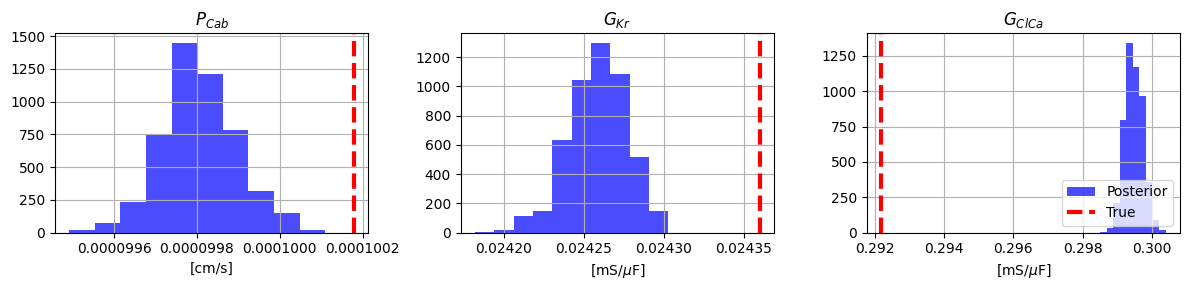

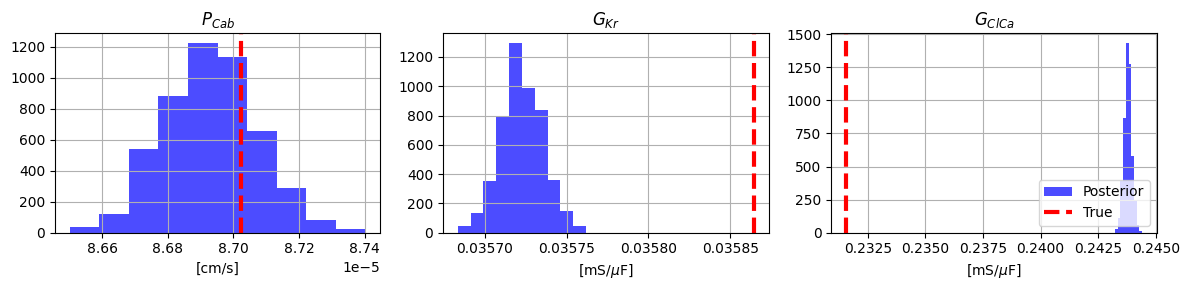

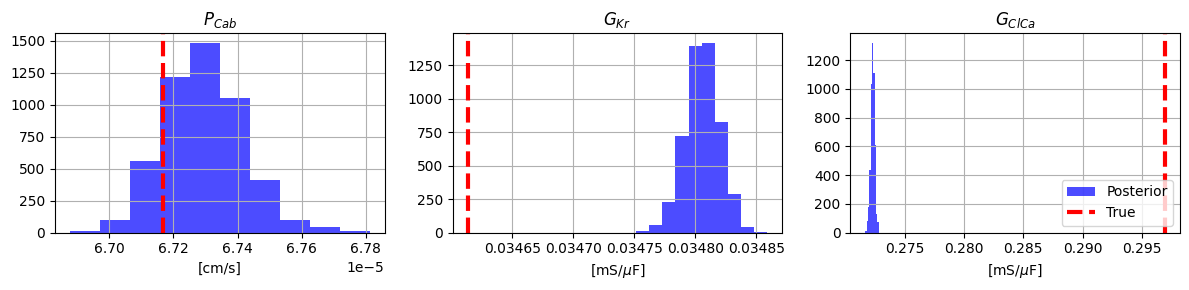

In [12]:
for i in range(50):
    conductances_i = conductances.to_numpy()[i, :]
    posterior_i = chains[0, :, 3 * i : 3 * (i + 1)]
    posterior_i_df = pd.DataFrame(posterior_i, columns=latex_names)
    num_rows = 1
    num_columns = 3
    histograms = posterior_i_df.hist(column=latex_names, alpha=0.7, layout=(num_rows, num_columns), figsize=(12, 3), label="Posterior", color="blue")
    num_params = len(latex_names)
    for row in range(num_rows):
        figs_in_row = num_columns
        if row == num_rows - 1:
            r = num_params % num_columns
            figs_in_row = r if r != 0 else num_params // num_rows
        for column in range(figs_in_row):
            index = row * num_columns + column
            ax = histograms[row][column]
            ax.axvline(conductances_i[index], color='r', linestyle='dashed', linewidth=3, label="True")
            unit = "[cm/s]" if latex_names[index] == "$P_{Cab}$" else "[mS/$\\mu$F]"
            ax.set_xlabel(unit)
    plt.tight_layout()
    ax.legend(loc='lower right')
    plt.show()

### Plotting the top-level distributions

In [23]:
true_top_params = [8.3757e-5, 0.15 * 8.3757e-5, 0.0321, 0.15 * 0.0321, 0.2843, 0.15 * 0.2843]
sample_top_params = [np.mean(conductances["P_Cab"]), np.std(conductances["P_Cab"]),
                     np.mean(conductances["G_Kr"]), np.std(conductances["G_Kr"]),
                     np.mean(conductances["G_ClCa"]), np.std(conductances["G_ClCa"])]

In [31]:
param_info_top_level_df = pd.DataFrame({"Name": top_level_names})
param_info_top_level_df["True"] = true_top_params
param_info_top_level_df["Sample (n = 50)"] = sample_top_params
param_info_top_level_df["Optimised (bio)"] = starting_position[-6:]
param_info_top_level_df["Optimised (trace)"] = starting_position_Tr[-6:]
param_info_top_level_df["Posterior mean (bio)"] = np.mean(chains[0, :, -6:], axis=0)
param_info_top_level_df["Posterior mean (trace)"] = np.mean(chains_Tr[0, :, -6:], axis=0)
param_info_top_level_df["Posterior std. dev. (bio)"] = np.std(chains[0, :, -6:], axis=0)
param_info_top_level_df["Posterior std. dev. (trace)"] = np.std(chains_Tr[0, :, -6:], axis=0)

In [32]:
param_info_top_level_df.to_csv("param_info_top_level.csv")

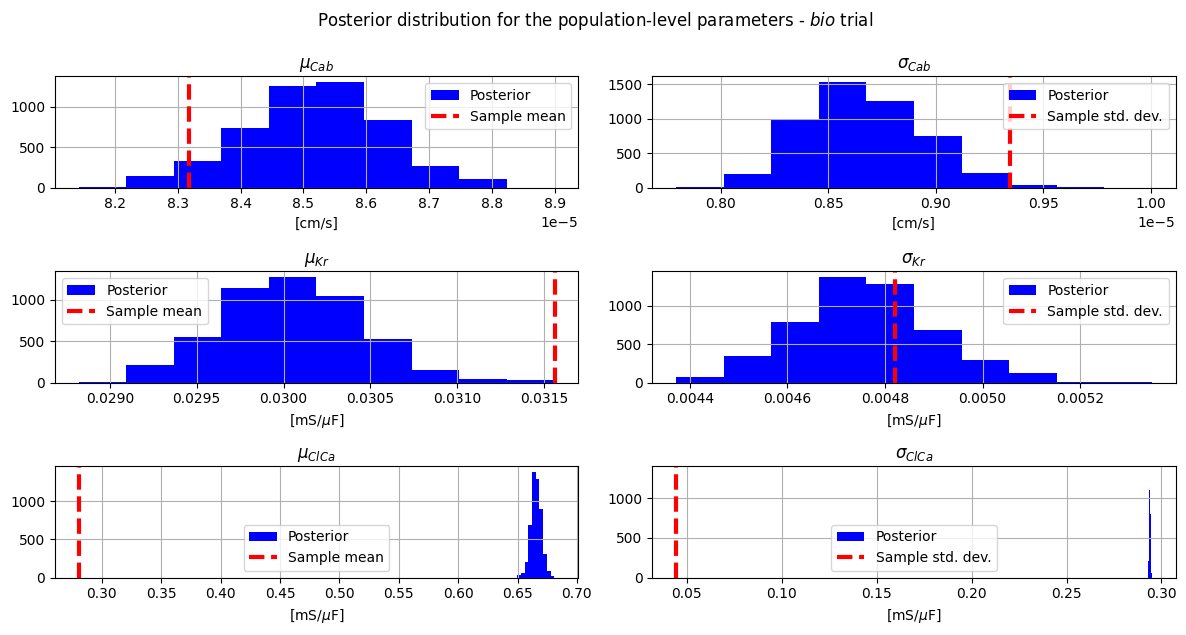

In [133]:
num_rows = 3
num_columns = 2
top_level_df = pd.DataFrame(chains[0, :, -6:], columns=top_level_names)
histograms = top_level_df.hist(layout=(num_rows, num_columns), figsize=(12, 6), label="Posterior", color="blue")
num_params = len(top_level_names)
for row in range(num_rows):
    figs_in_row = num_columns
    if row == num_rows - 1:
        r = num_params % num_columns
        figs_in_row = r if r != 0 else num_params // num_rows
    for column in range(figs_in_row):
        index = row * num_columns + column
        ax = histograms[row][column]
        metric = "mean" if column == 0 else "std. dev."
        ax.axvline(sample_top_params[index], color='r', linestyle='dashed', linewidth=3, label=f"Sample {metric}")
        unit = "[cm/s]" if "P_Cab" in top_level_names[index] else "[mS/$\\mu$F]"
        ax.set_xlabel(unit)
        ax.set_title(top_level_latex_names[index])
        ax.legend()
plt.tight_layout()
plt.suptitle("Posterior distribution for the population-level parameters - $bio$ trial", x=0.5, y=1.05)
plt.savefig("inference_outputs/population_posteriors_lca_kr_cl.png", bbox_inches='tight')

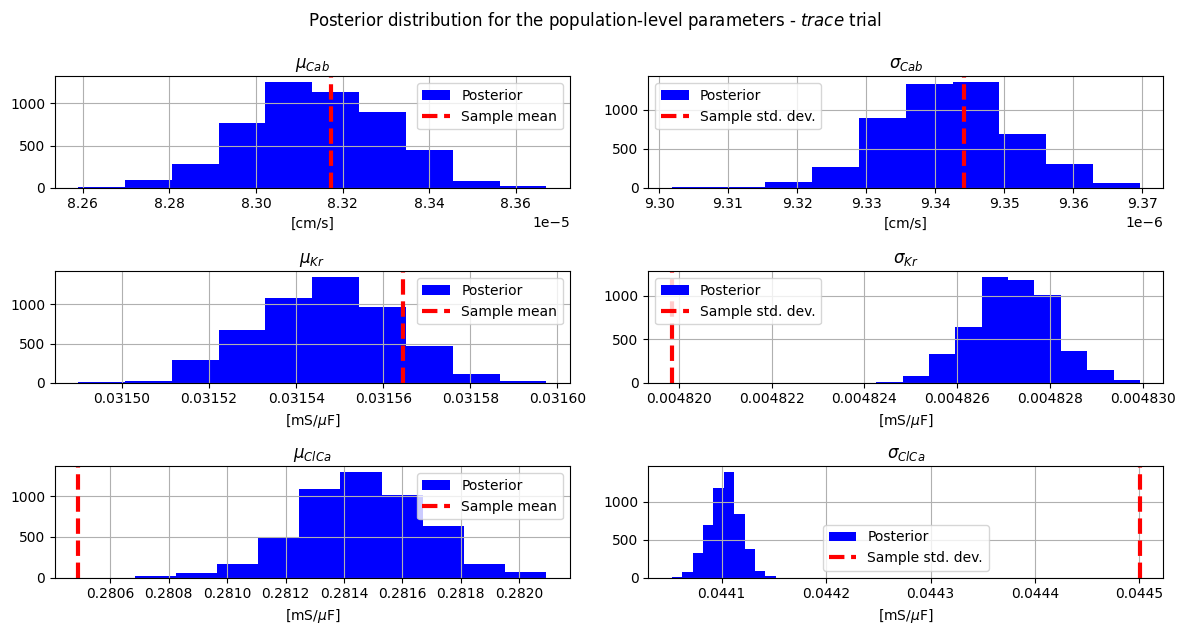

In [135]:
num_rows = 3
num_columns = 2
top_level_df_Tr = pd.DataFrame(chains_Tr[0, :, -6:], columns=top_level_names)
histograms = top_level_df_Tr.hist(layout=(num_rows, num_columns), figsize=(12, 6), label="Posterior", color="blue")
num_params = len(top_level_names)
for row in range(num_rows):
    figs_in_row = num_columns
    if row == num_rows - 1:
        r = num_params % num_columns
        figs_in_row = r if r != 0 else num_params // num_rows
    for column in range(figs_in_row):
        index = row * num_columns + column
        ax = histograms[row][column]
        metric = "mean" if column == 0 else "std. dev."
        ax.axvline(sample_top_params[index], color='r', linestyle='dashed', linewidth=3, label=f"Sample {metric}")
        unit = "[cm/s]" if "P_Cab" in top_level_names[index] else "[mS/$\\mu$F]"
        ax.set_xlabel(unit)
        ax.set_title(top_level_latex_names[index])
        ax.legend()
plt.tight_layout()
plt.suptitle("Posterior distribution for the population-level parameters - $trace$ trial", x=0.5, y=1.05)
plt.savefig("inference_outputs/population_posteriors_lca_kr_cl_Tr.png", bbox_inches='tight')

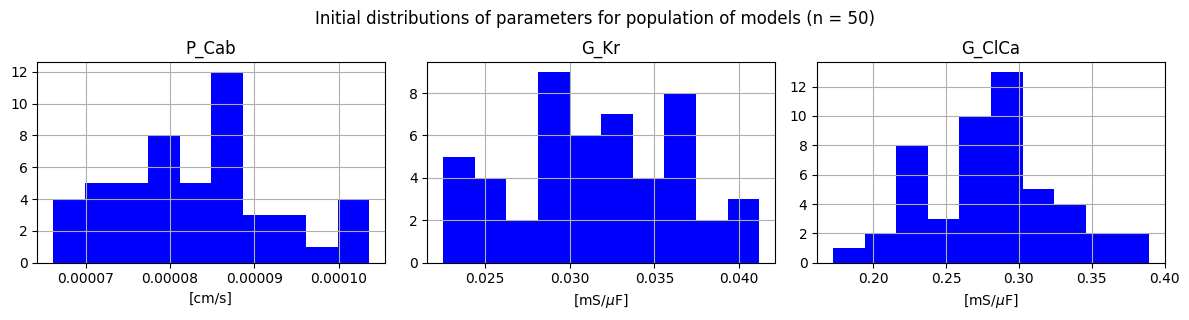

In [15]:
num_rows, num_columns = 1, 3
num_params = 3
histograms = conductances.hist(layout=(num_rows, num_columns), figsize=(12, 3), color="blue")
for row in range(num_rows):
    figs_in_row = num_columns
    if row == num_rows - 1:
        r = num_params % num_columns
        figs_in_row = r if r != 0 else num_params // num_rows
    for column in range(figs_in_row):
        index = row * num_columns + column
        ax = histograms[row][column]
        unit = "[cm/s]" if "Cab" in latex_names[index] else "[mS/$\\mu$F]"
        ax.set_xlabel(unit)
plt.tight_layout()
plt.suptitle("Initial distributions of parameters for population of models (n = 50)", x=0.5, y=1.05)
plt.savefig("simulation_outputs/initial_distributions_Tr.png", bbox_inches='tight')

### Combined distributions

Here we combine all $50$ distributions into one large histogram to see what the overall posterior looks like.

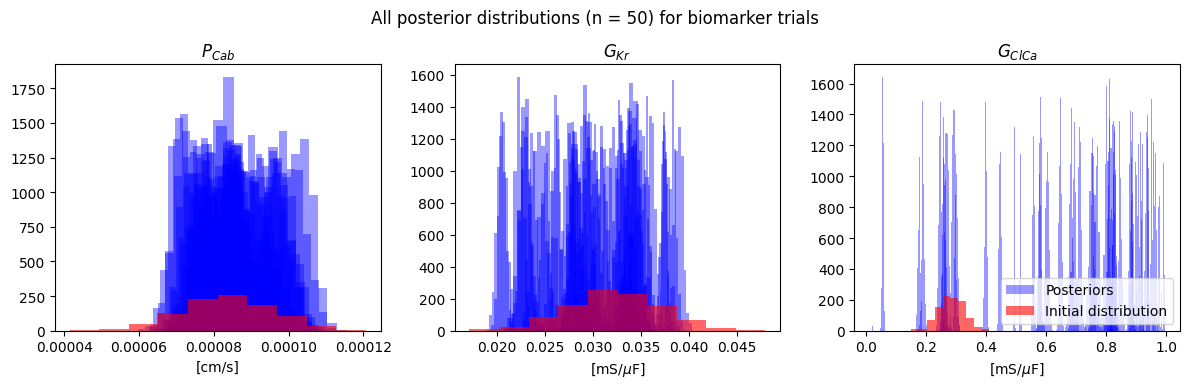

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
num_rows = 1
num_columns = 3
num_params = len(latex_names)
for j, ax in enumerate(axs):
    index = j
    for i in range(50):
        conductances_i = conductances.to_numpy()[i, :]
        posterior_i = chains[0, 15000:, 3 * i : 3 * (i + 1)]
        posterior_i_df = pd.DataFrame(posterior_i, columns=latex_names)
        if i == 0:
            ax.hist(posterior_i_df[latex_names[index]], alpha=0.4, color="blue", label="Posteriors")
        else:
            ax.hist(posterior_i_df[latex_names[index]], alpha=0.4, color="blue")
    # ax.axvline(true_top_params[index * 2], color='r', linestyle='dashed', linewidth=3, label="Mean")
    gauss_sample = np.random.normal(true_top_params[index * 2], true_top_params[index * 2 + 1], 1000)
    ax.hist(gauss_sample, color='r', label="Initial distribution", alpha=0.6)
    unit = "[cm/s]" if latex_names[index] == "$P_{Cab}$" else "[mS/$\\mu$F]"
    ax.set_xlabel(unit)
    ax.set_title(latex_names[index])
fig.suptitle("All posterior distributions (n = 50) for biomarker trials", x=0.5, y=0.96)
fig.tight_layout()
ax.legend(loc='lower right')
plt.show()
fig.savefig("inference_outputs/all_posteriors_bio.png", bbox_inches='tight')

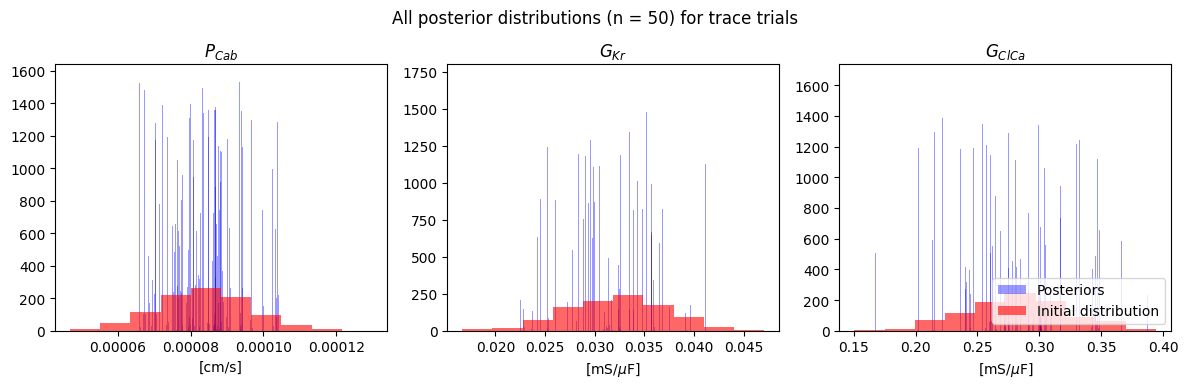

In [87]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
num_rows = 1
num_columns = 3
num_params = len(latex_names)
for j, ax in enumerate(axs):
    index = j
    for i in range(50):
        conductances_i = conductances.to_numpy()[i, :]
        posterior_i = chains_Tr[0, 15000:, 3 * i : 3 * (i + 1)]
        posterior_i_df = pd.DataFrame(posterior_i, columns=latex_names)
        if i == 0:
            ax.hist(posterior_i_df[latex_names[index]], alpha=0.4, color="blue", label="Posteriors")
        else:
            ax.hist(posterior_i_df[latex_names[index]], alpha=0.4, color="blue")
    # ax.axvline(true_top_params[index * 2], color='r', linestyle='dashed', linewidth=3, label="Mean")
    gauss_sample = np.random.normal(true_top_params[index * 2], true_top_params[index * 2 + 1], 1000)
    ax.hist(gauss_sample, color='r', label="Initial distribution", alpha=0.6)
    unit = "[cm/s]" if latex_names[index] == "$P_{Cab}$" else "[mS/$\\mu$F]"
    ax.set_xlabel(unit)
    ax.set_title(latex_names[index])
fig.suptitle("All posterior distributions (n = 50) for trace trials", x=0.5, y=0.96)
fig.tight_layout()
ax.legend(loc='lower right')
plt.show()
fig.savefig("inference_outputs/all_posteriors_trace.png", bbox_inches='tight')

In [79]:
codes = ["bio", "Tr"]
long_names = ["biomarkers", "traces"]

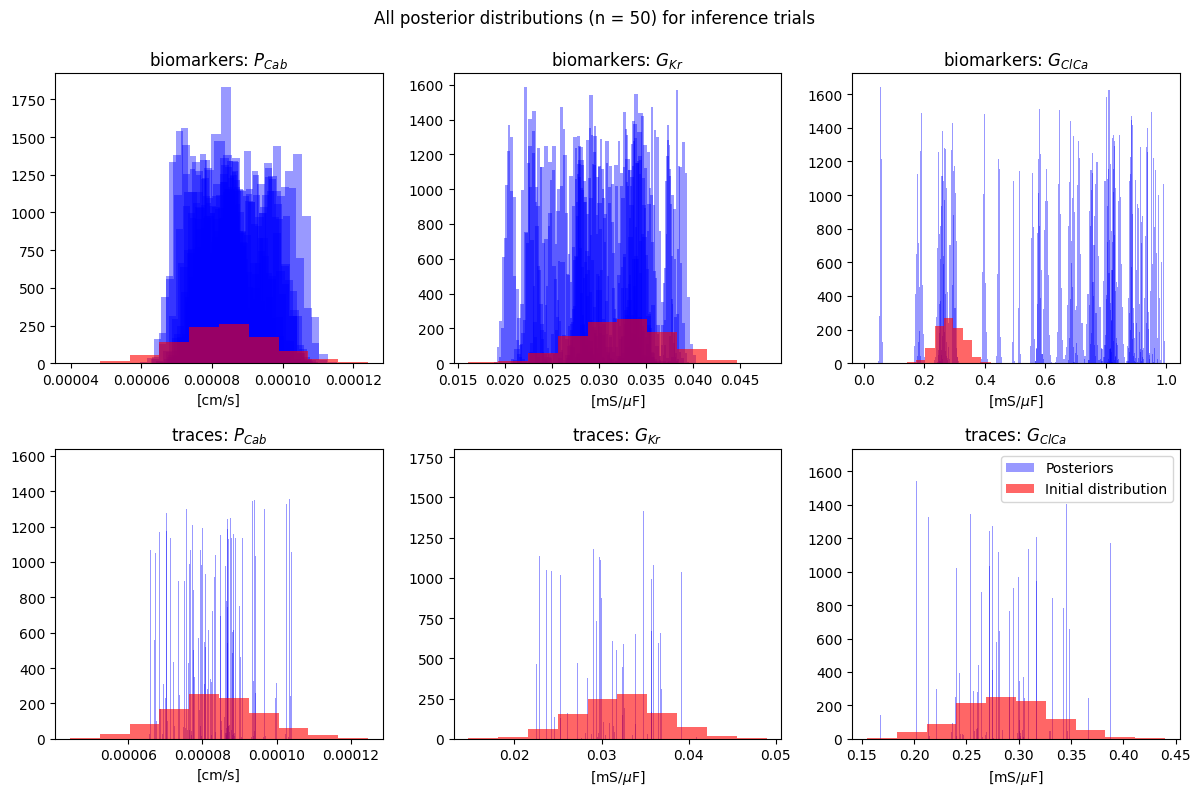

In [95]:
num_rows = 2
num_columns = 3
fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, 8))
num_params = len(latex_names)
for k, row in enumerate(axs):
    current_chains = chains if k == 0 else chains_Tr
    for j, ax in enumerate(row):
        index = k * num_rows + j
        for i in range(50):
            # conductances_i = conductances.to_numpy()[i, :]
            posterior_i = current_chains[0, :, 3 * i : 3 * (i + 1)]
            posterior_i_df = pd.DataFrame(posterior_i, columns=latex_names)
            if i == 0:
                ax.hist(posterior_i_df[latex_names[j]], alpha=0.4, color="blue", label="Posteriors")
            else:
                ax.hist(posterior_i_df[latex_names[j]], alpha=0.4, color="blue")
        # ax.axvline(true_top_params[index * 2], color='r', linestyle='dashed', linewidth=3, label="Mean")
        gauss_sample = np.random.normal(true_top_params[j * 2], true_top_params[j * 2 + 1], 1000)
        ax.hist(gauss_sample, color='r', label="Initial distribution", alpha=0.6)
        unit = "[cm/s]" if latex_names[j] == "$P_{Cab}$" else "[mS/$\\mu$F]"
        ax.set_xlabel(unit)
        ax.set_title(f"{long_names[k]}: {latex_names[j]}")
fig.suptitle("All posterior distributions (n = 50) for inference trials", x=0.5, y=0.99)
fig.tight_layout()
ax.legend(loc='upper right')
plt.show()
fig.savefig("inference_outputs/all_posteriors_both.png", bbox_inches='tight')

### An alternative view of the posteriors

Here we plot the posteriors as means and standard deviations on a scatter plot, against the true parameter value. Therefore, we wish to have all points on the scatter as close to the line $y = x$ as possible for greatest accuracy, with small error bars.

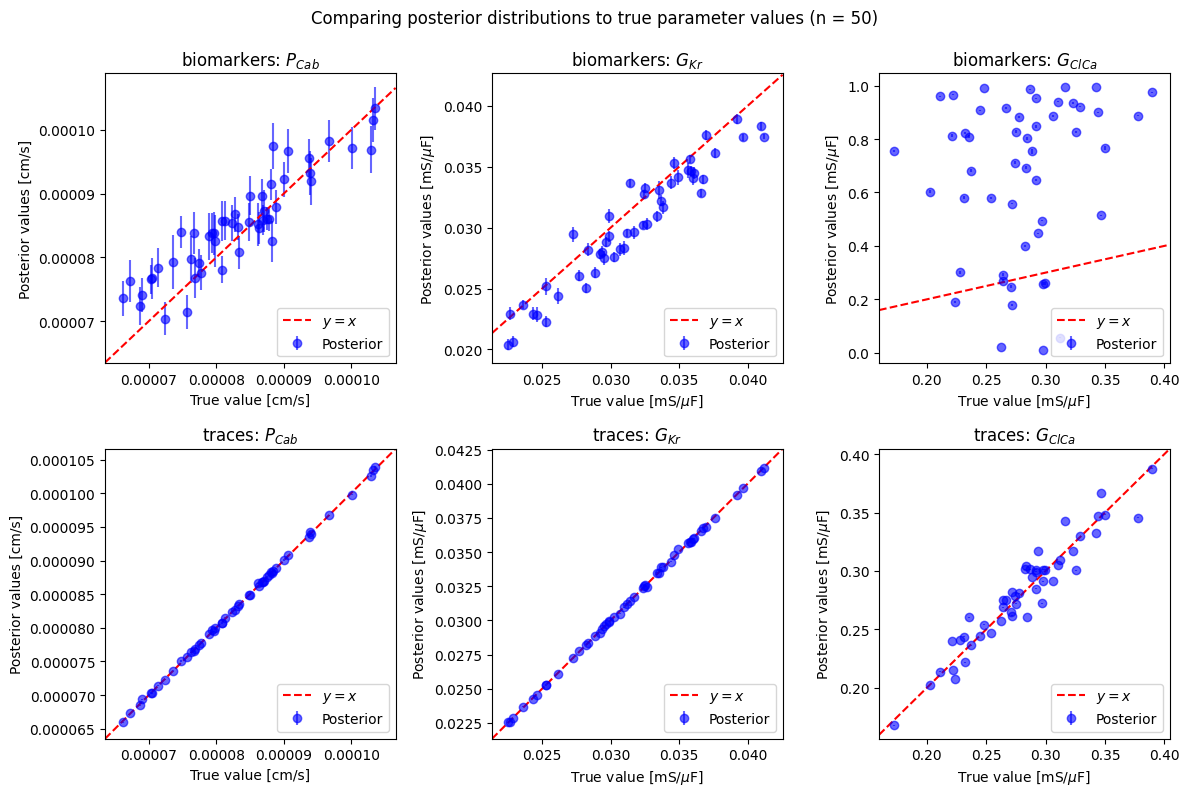

In [102]:
num_rows = 2
num_columns = 3
fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, 8))
num_params = len(latex_names)
for k, row in enumerate(axs):
    current_chains = chains if k == 0 else chains_Tr
    for j, ax in enumerate(row):
        index = k * num_rows + j
        for i in range(50):
            conductances_i = conductances.to_numpy()[i, :]
            posterior_i = current_chains[0, :, 3 * i : 3 * (i + 1)]
            # The x-position is the true value, the y-position is the posterior mean and standard deviation
            if i == 0:
                ax.errorbar(conductances_i[j], np.mean(posterior_i[:, j]), yerr=np.std(posterior_i[:, j]), 
                            fmt="o", color="blue", alpha=0.6, label="Posterior")
            else:
                ax.errorbar(conductances_i[j], np.mean(posterior_i[:, j]), yerr=np.std(posterior_i[:, j]), 
                            fmt="o", color="blue", alpha=0.6)
        min_conductances = np.min(conductances.to_numpy(), axis=0)
        max_conductances = np.max(conductances.to_numpy(), axis=0)
        # This is the line y = x
        a = min_conductances[j] * 0.99
        b = max_conductances[j] * 1.01
        ax.axline((a, a), (b, b), linestyle="--", color='r', label="$y = x$")
        unit = "[cm/s]" if latex_names[j] == "$P_{Cab}$" else "[mS/$\\mu$F]"
        ax.set_xlabel(f"True value {unit}")
        ax.set_ylabel(f"Posterior values {unit}")
        ax.set_title(f"{long_names[k]}: {latex_names[j]}")
        ax.legend(loc='lower right')
fig.suptitle("Comparing posterior distributions to true parameter values (n = 50)", x=0.5, y=0.99)
fig.tight_layout()
plt.show()
fig.savefig("inference_outputs/posterior_scatter.png", bbox_inches='tight')

### Inferred series with 95% credible intervals

In this part, we take $100$ samples from each of the $50$ posteriors and generate action potentials and calcium transients for each. We then take the mean and 95% confidence interval. We will use these to plot ranges of biomarkers.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pints
import scipy.integrate as si
from numba import jit

import torord_rhs_new

In [40]:
initial_conditions = [pd.read_csv(f"simulation_outputs/default/ics_{i}.csv", index_col=0).to_numpy()[:, 0]
                      for i in range(50)]

In [55]:
class ToRORdModel(pints.ForwardModel):

    def __init__(self, initial_conditions, stimulating_current, fixed_params=None, outputs=["V", "c"],
                 rtol=10**(-3), atol=10**(-6)):
        """Initialises the forward model with certain fixed parameters passed to the method
        as key-value pairs.
        """
        super(ToRORdModel, self).__init__()
        assert len(initial_conditions) == 43
        self._initial_conditions = initial_conditions
        # The current conditions represent the state of the model after one beat
        self._current_conditions = initial_conditions
        self._reset_model = True

        assert len(stimulating_current) == 2
        self._stim_duration, self._stim_amplitude = tuple(stimulating_current)
        self._param_names = ["$G_{Na}$", "$P_{Cab}$", "$G_{Kr}$", "$G_{ClCa}$", "$G_{Clb}$", "$G_{to}$"]
        self._variable_names = ["V", "Na_i", "Na_ss", "K_i", "K_ss", "Ca_i", "Ca_ss", "Ca_nsr", "Ca_jsr",
                                "m", "hp", "h", "j", "jp",
                                "mL", "hL", "hLp",
                                "a", "iF", "iS", "ap", "iFp", "iSp",
                                "d", "ff", "fs", "fcaf", "fcas", "jca", "nca", "nca_i", "ffp", "fcafp",
                                "xs1", "xs2",
                                "Jrel_np", "CaMKt",
                                "ikr_c0", "ikr_c1", "ikr_c2", "ikr_o", "ikr_i",
                                "Jrel_p"]
        self._fixed_params = {}
        if fixed_params is not None:
            for k in fixed_params.keys():
                if k in self._param_names:
                    self._fixed_params[k] = fixed_params[k]

        assert 1 <= len(outputs) <= 43
        assert set(outputs).issubset(set(self._variable_names))
        self._outputs = outputs
        self._rtol = rtol
        self._atol = atol
        # If we wish to specific current or flux multipliers, we do so in the dict below (e.g. for blocking channels)
        self.multipliers = {"I_CaL": 1, "I_Na": 1, "I_to": 1, "I_NaL": 1, "I_Kr": 1, "I_Ks": 1, "I_K1": 1, "I_Kb": 1,
                             "I_NaCa": 1, "I_NaK": 1, "I_Nab": 1, "I_Cab": 1, "I_pCa": 1, "I_CaCl": 1, "I_Clb": 1,
                             "J_rel": 1, "J_up": 1}
        # If we wish to change the extracellular concentrations or subspace fractions, we do so here
        self.concs_and_fractions = {"Na_o": 140.0, "Ca_o": 1.8, "K_o": 5.0, "ICaL_fractionSS": 0.8, "INaCa_fractionSS": 0.35}

    def get_param_names(self):
        """Returns the parameter names.
        """
        return self._param_names

    def get_unfixed_param_names(self):
        """Returns the unfixed parameters
        """
        output_list = self._param_names.copy()
        for fixed_param in self._fixed_params.keys():
            output_list.remove(fixed_param)
        return output_list

    def n_outputs(self):
        """Returns number of model outputs, default to just V and c
        """
        return len(self._outputs)

    def n_parameters(self):
        """Returns number of parameters to be inferred, i.e. all non-fixed parameters.
        """
        return len(self._param_names) - len(self._fixed_params)

    def n_fixed_parameters(self):
        """Returns number of parameters we fix.
        """
        return len(self._fixed_params)

    def simulate(self, parameters, times):
        """This inherits from pints.ForwardModel, performs one forward simulation of the model.
        The list `parameters` contains only the parameters we are inferring.
        """
        G_Na, P_Cab, G_Kr, G_ClCa, G_Clb, G_to = self._get_all_params(parameters)
        t_span = [times[0], times[len(times) - 1]]
        
        # For the line below, our starting state will either be the true initial conditions,
        # or the conditions of the model at the end of the last heartbeat
        y0 = self._initial_conditions if self._reset_model else self._current_conditions        
        sol = si.odeint(func=self._rhs, y0=y0, t=times, 
                        args=(G_Na, P_Cab, G_Kr, G_ClCa, G_Clb, G_to,
                              self._stim_duration, self._stim_amplitude, 
                              np.array(list(self.multipliers.values())), 
                              np.array(list(self.concs_and_fractions.values()))),
                        rtol=self._rtol, atol=self._atol)
        self._current_conditions = sol[-1, :]

        # Now we find which outputs we wish to use
        output_indices = [self._variable_names.index(variable) for variable in self._outputs]
        return np.array([sol[:, index] for index in output_indices]).transpose()

    def _get_all_params(self, parameters):
        """We need a list of 6 parameters, so we check to see which parameters are fixed, and which are not.
        We increment j each time a non-fixed parameter is reached.
        """
        all_parameters = []
        j = 0
        for param in self._param_names:
            if param in self._fixed_params.keys():
                all_parameters.append(self._fixed_params[param])
            else:
                all_parameters.append(parameters[j])
                j += 1
        return tuple(all_parameters)

    @staticmethod
    @jit
    def _rhs(y, t, G_Na, P_Cab, G_Kr, G_ClCa, G_Clb, G_to, stim_duration, stim_amplitude, multipliers, concs_and_fractions):
        """The right hand side function of the ToR-ORd system. This is in a separate file as it is 
        a very long system of equations.
        """
        # rhs = ToRORdRHS(t, y, G_Na, P_Cab, G_Kr, G_ClCa, G_Clb, stim_duration, stim_amplitude, multipliers, concs_and_fractions)
        rhs = torord_rhs_new.evaluate(t, y, G_Na, P_Cab, G_Kr, G_ClCa, G_Clb, G_to, stim_duration, stim_amplitude, 
                                      multipliers, concs_and_fractions)
        return np.array(rhs)

In [45]:
stim_params = [1, -53]

In [47]:
def get_duration_90(y, times):
    """Retrieves the time between peak y and y at 90% of its resting value. y could represent the membrane potential
    or calcium transient. If spline=True then a smoothed cubic spline will be made of the data to calculate
    this duration.
    """
    max_y = np.max(y)
    index_of_max_y = np.argmax(y)
    time_of_max_y = times[index_of_max_y]
    final_y = y[-1]
    threshold = final_y + 0.1 * (max_y - final_y)
    for i in range(index_of_max_y, len(y)):
        if y[i] < threshold:
            return times[i] - time_of_max_y

In [59]:
def create_CI_data(initial_conditions: list, fixed_params: dict, times: np.array, posterior_filename: str, nsims=500):
    """This method first creates a ToR-ORd model instance with the desired fixed parameters, and then simulates
    the model multiple times and retrieves the mean and standard deviations of the data.
    """
    posterior = pd.read_csv(posterior_filename, index_col=0).to_numpy()[15000:, :]
    # The below line ensures we randomly sample nsims simulations
    np.random.shuffle(posterior)
    all_data = []
    for i in range(50):
        print(i, end=" ")
        model = ToRORdModel(initial_conditions[i], stim_params, fixed_params=fixed_params, outputs=["V", "Ca_i"], rtol=10**(-8), atol=10**(-8))
        for sim in range(nsims):
            all_data.append(model.simulate(posterior[sim, 3 * i : 3 * (i + 1)], times))
    all_data_array = np.array(all_data)
    mean_data = np.mean(all_data_array, axis=0)
    # std_dev_data = np.std(all_data_array, axis=0)
    upper_bound_data = np.percentile(all_data_array, 97.5, axis=0)
    lower_bound_data = np.percentile(all_data_array, 2.5, axis=0)

    # Here we generate the biomarker data for each of the samples
    APD90_data = []
    CaTD90_data = []
    CaTA_data = []
    for sample in all_data:
        APD90_data.append(get_duration_90(sample[:, 0], times))
        CaTD90_data.append(get_duration_90(sample[:, 1], times))
        CaTA_data.append(np.max(sample[:, 1]))
    return mean_data, upper_bound_data, lower_bound_data, APD90_data, CaTD90_data, CaTA_data

We will run the below cell for the two different scenarios, producing data for each one from the different posteriors.

In [50]:
times = np.arange(0, 1000, 2)

In [61]:
fixed_params = {"$G_{Na}$": 11.7802, "$G_{Clb}$": 0.00198, "$G_{to}$": 0.16}
mean_data, upper_bound_data, lower_bound_data, APD90_data, CaTD90_data, CaTA_data = create_CI_data(initial_conditions, fixed_params, 
                                                                                                   times, "chains/lca_kr_cl_Tr/chain.csv",
                                                                                                   nsims=100)
pd.DataFrame(mean_data, columns=["V", "Ca_i"]).to_csv("further_analysis/mean_Tr.csv")
pd.DataFrame(upper_bound_data, columns=["V", "Ca_i"]).to_csv("further_analysis/upper_Tr.csv")
pd.DataFrame(lower_bound_data, columns=["V", "Ca_i"]).to_csv("further_analysis/lower_Tr.csv")
# pd.DataFrame(np.array([APD90_data, CaTD90_data, CaTA_data]).transpose(), 
#              columns=["APD90", "CaTD90", "CaTA"]).to_csv("further_analysis/biomarkers.csv")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

### Membrane potential

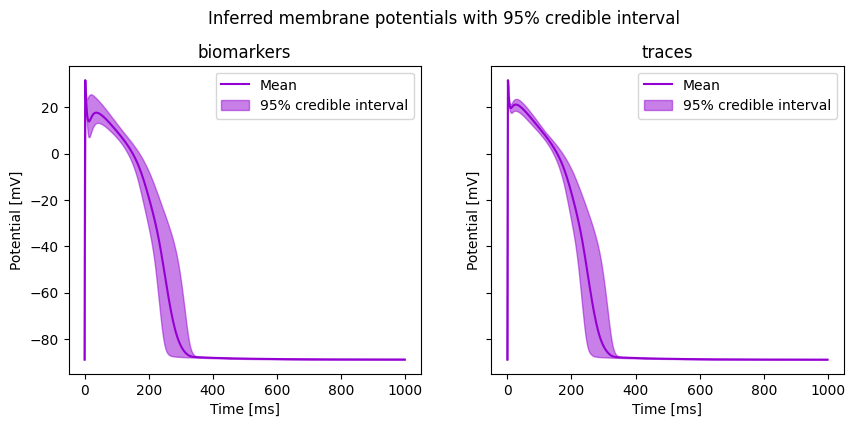

In [89]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
for j, ax in enumerate(axs):
    index = j
    code = codes[index]
    mean_V = pd.read_csv(f"further_analysis/mean_{code}.csv", index_col=0).to_numpy()[:, 0]
    lower_bound_V = pd.read_csv(f"further_analysis/lower_{code}.csv", index_col=0).to_numpy()[:, 0]
    upper_bound_V = pd.read_csv(f"further_analysis/upper_{code}.csv", index_col=0).to_numpy()[:, 0]
    # noisy_V = noisy_data[:, 0]
    ax.plot(times, mean_V, color="darkviolet", label="Mean")
    ax.fill_between(times, lower_bound_V, upper_bound_V, color='darkviolet', alpha=0.5, 
                    label="95% credible interval")
    # ax.plot(times, noisy_V, color="black", alpha=0.55, label="True data")
    ax.set_xlabel("Time [ms]")
    ax.set_ylabel("Potential [mV]")
    ax.legend()
    ax.set_title(long_names[index])
fig.suptitle("Inferred membrane potentials with 95% credible interval", x=0.5, y=1.02)
fig.savefig("further_analysis/inferred_membrane_potentials.png", bbox_inches="tight")

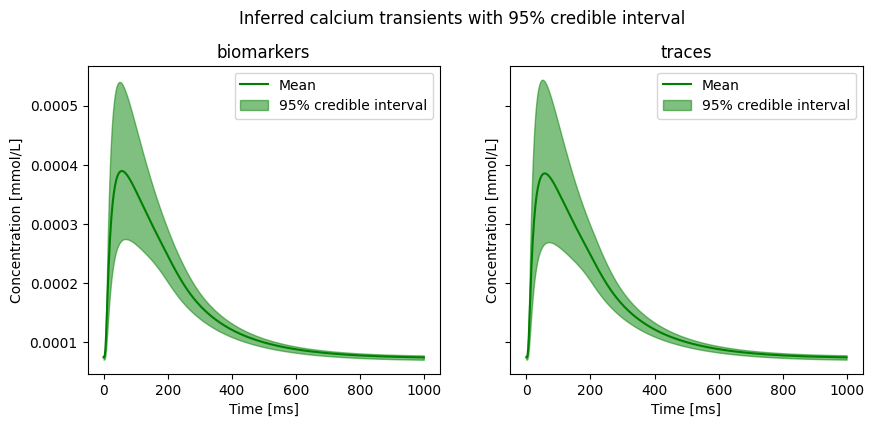

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
for j, ax in enumerate(axs):
    index = j
    code = codes[index]
    mean_V = pd.read_csv(f"further_analysis/mean_{code}.csv", index_col=0).to_numpy()[:, 1]
    lower_bound_V = pd.read_csv(f"further_analysis/lower_{code}.csv", index_col=0).to_numpy()[:, 1]
    upper_bound_V = pd.read_csv(f"further_analysis/upper_{code}.csv", index_col=0).to_numpy()[:, 1]
    # noisy_V = noisy_data[:, 0]
    ax.plot(times, mean_V, color="green", label="Mean")
    ax.fill_between(times, lower_bound_V, upper_bound_V, color='green', alpha=0.5, 
                    label="95% credible interval")
    # ax.plot(times, noisy_V, color="black", alpha=0.55, label="True data")
    ax.set_xlabel("Time [ms]")
    ax.set_ylabel("Concentration [mmol/L]")
    ax.legend()
    ax.set_title(long_names[index])
fig.suptitle("Inferred calcium transients with 95% credible interval", x=0.5, y=1.02)
fig.savefig("further_analysis/inferred_calcium_transients.png", bbox_inches="tight")

### Creating biomarker histograms

For the $bio$ trials only, we wish to plots the spread using the above $5000$ curves.

First, we will calculate the biomarkers for the original data using the original conductances.

In [117]:
all_data = []
for i in range(50):
    print(i, end=" ")
    model = ToRORdModel(initial_conditions[i], stim_params, fixed_params=fixed_params, outputs=["V", "Ca_i"], rtol=10**(-8), atol=10**(-8))
    all_data.append(model.simulate(conductances.to_numpy()[i, :], times))
# Here we generate the biomarker data for each of the samples
APD90_data = [get_duration_90(all_data[i][:, 0], times) for i in range(50)]
CaTD90_data = [get_duration_90(all_data[i][:, 1], times) for i in range(50)]
CaTA_data = [np.max(all_data[i][:, 1]) for i in range(50)]
std_dev_APD90 = np.std(APD90_data)
std_dev_CaTD90 = np.std(CaTD90_data)
std_dev_CaTA = np.std(CaTA_data)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [118]:
biomarker_names = ["APD90", "CaTA", "CaTD90"]
initial_std_devs = {"APD90": [std_dev_APD90, "Time [ms]"], 
                    "CaTA": [std_dev_CaTA, "Concentration [mmol/L]"], 
                    "CaTD90": [std_dev_CaTD90, "Time [ms]"]}

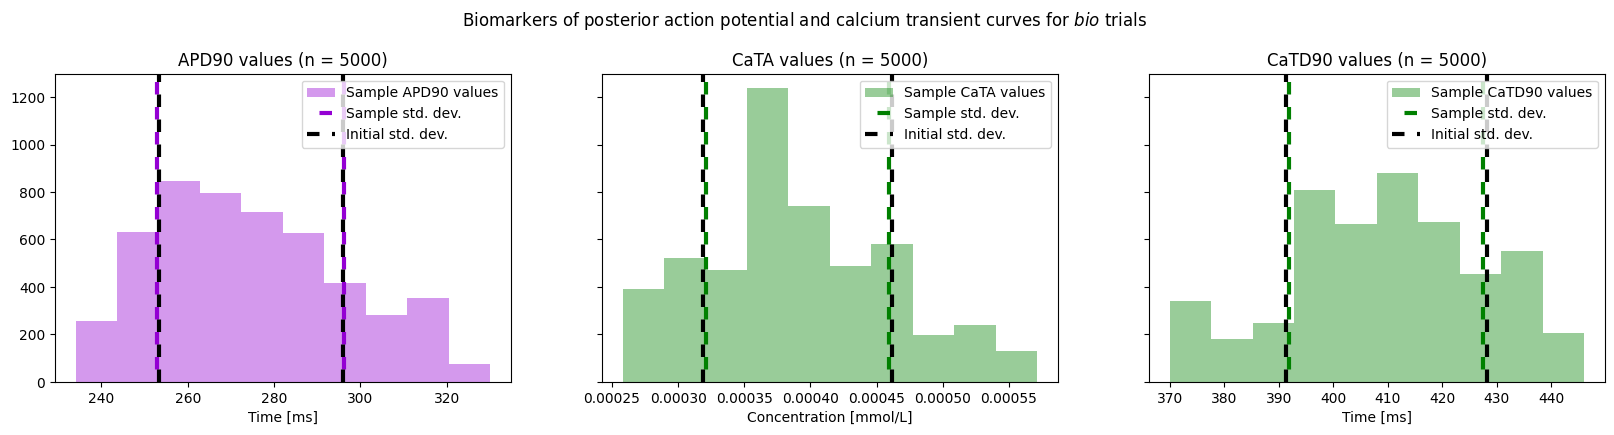

In [122]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), sharex=False, sharey=True)
bio_df = pd.read_csv("further_analysis/biomarkers.csv", index_col=0)
for j, ax in enumerate(axs):
    index = j
    biomarker_name = biomarker_names[j]
    initial_std_dev = initial_std_devs[biomarker_name][0]
    unit = initial_std_devs[biomarker_name][1]
    bio_data_j = bio_df[biomarker_name]
    bio_data_j_std_dev = np.std(bio_data_j)
    mean = np.mean(bio_data_j)
    colour = "darkviolet" if biomarker_name == "APD90" else "green"
    ax.hist(bio_data_j, color=colour, label=f"Sample {biomarker_name} values", alpha=0.4)
    ax.axvline(mean + bio_data_j_std_dev, color=colour, linestyle=(3, (3, 3)), label="Sample std. dev.",
               linewidth=3)
    ax.axvline(mean - bio_data_j_std_dev, color=colour, linestyle=(3, (3, 3)),
               linewidth=3)
    ax.axvline(mean + initial_std_dev, color="black", linestyle=(0, (3, 3)), label="Initial std. dev.",
               linewidth=3)
    ax.axvline(mean - initial_std_dev, color="black", linestyle=(0, (3, 3)),
               linewidth=3)
    ax.set_xlabel(unit)
    ax.legend()
    ax.set_title(f"{biomarker_name} values (n = 5000)")
fig.suptitle("Biomarkers of posterior action potential and calcium transient curves for $bio$ trials", x=0.5, y=1.04)
fig.savefig("further_analysis/inferred_biomarkers.png", bbox_inches="tight")